<a id="top"></a>
## Data Wranlging with R

* [Joins](#joins)
* [Web Scraping](#web)
* [String Processing](#string)
* [RegEx](#regex)
    * [Search and Replace with RegEx](#search)
    * [Groups and Quantifiers](#groups)
    * [Case Study: Extracting a Table from a PDF](#pdf)
    * [Recoding](#recode)
    * [Dates, Times, and Text Mining](#dates)
* [Text Mining](#textm)

In [2]:
library(tidyverse)
library(dslabs)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
getwd()

[1] "/Users/tarekatwan/Documents/Jupyter Notebooks/Edx"

In [3]:
path <- system.file("extdata", package = "dslabs")
list.files(path)

[1] "fertility-two-countries-example.csv"                    
[2] "life-expectancy-and-fertility-two-countries-example.csv"
[3] "murders.csv"

** Set file full path in order to move/copy it to working directory **

In [4]:
filename <- 'murders.csv'
fullpath <- file.path(path, filename)
fullpath

[1] "/anaconda3/envs/r34/lib/R/library/dslabs/extdata/murders.csv"

In [5]:
# make a copy of file in working directory
file.copy(fullpath, getwd())

[1] TRUE

In [6]:
# check if file is there 
file.exists(filename)

[1] TRUE

** Creating a data directory and moving file to that directory **

In [11]:
dir.create(path = 'data')
newpath <- file.path(getwd(), 'data')
finalpath <- file.path(newpath, filename)
file.copy(fullpath, finalpath)

[1] TRUE

In [12]:
read_lines(filename, n_max = 3)

[1] "state,abb,region,population,total" "Alabama,AL,South,4779736,135"     
[3] "Alaska,AK,West,710231,19"

** Working with tibble **

In [13]:
dat <- read_csv(filename)

Parsed with column specification:
cols(
  state = col_character(),
  abb = col_character(),
  region = col_character(),
  population = col_integer(),
  total = col_integer()
)


In [14]:
head(dat)

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [15]:
class(dat)

[1] "tbl_df"     "tbl"        "data.frame"

In [16]:
# as compared to read.csv
dat2 <- read.csv(filename)
head(dat2)
class(dat2)

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


[1] "data.frame"

** Difference between tibble and data.frame using read_csv vs read.csv **

In [18]:
# using read_csv to create tibble
class(dat$abb)
class(dat$region)

# using read.csv to create dataframe
class(dat2$abb)
class(dat2$region)

[1] "character"

[1] "character"

[1] "factor"

[1] "factor"

In [19]:
# we can accomplish similar with read.csv by setting StringsAsFactor
dat3 <- read.csv(filename, stringsAsFactors = FALSE)
class(dat3$abb)

[1] "character"

** Reading directly from a URL **

In [21]:
url <- "https://raw.githubusercontent.com/rafalab/dslabs/master/inst/extdata/murders.csv"
dat4 <- read_csv(url)
class(dat4)
head(dat4)

Parsed with column specification:
cols(
  state = col_character(),
  abb = col_character(),
  region = col_character(),
  population = col_integer(),
  total = col_integer()
)


[1] "tbl_df"     "tbl"        "data.frame"

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


** Downloading a local copy from URL **

In [24]:
finalpathURL <- file.path(newpath, 'murders2.csv')
file.copy(fullpath, finalpathURL)

download.file(url, finalpathURL)

[1] TRUE

** Two useful functions when downloading from the internet are tempdir() and tempfile() **

In [25]:
tempdir() #not unique when run multiple times
tempfile() #unique when run multiple times

[1] "/var/folders/tz/6_6rv33d6sb7bys_c83txq5m0000gn/T//RtmpnZP8KM"

[1] "/var/folders/tz/6_6rv33d6sb7bys_c83txq5m0000gn/T//RtmpnZP8KM/file1e073f6434a5"

In [26]:
tmp_filename <- tempfile()
download.file(url, tmp_filename)
dat5 <- read_csv(tmp_filename)
file.remove(tmp_filename)
head(dat5)

Parsed with column specification:
cols(
  state = col_character(),
  abb = col_character(),
  region = col_character(),
  population = col_integer(),
  total = col_integer()
)


[1] TRUE

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


### Tidy Data

>  **What is tidy data**: each row represents one observation and the columns represent the different variables that we have data on for those observations 

In [27]:
data('gapminder')

In [28]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [31]:
tidy_data <- gapminder %>%
    filter(country %in% c("South Korea", "Germany")) %>%
    select(country, year, fertility)

head(tidy_data)

country,year,fertility
Germany,1960,2.41
South Korea,1960,6.16
Germany,1961,2.44
South Korea,1961,5.99
Germany,1962,2.47
South Korea,1962,5.79


Warning message:
“Removed 2 rows containing missing values (geom_point).”

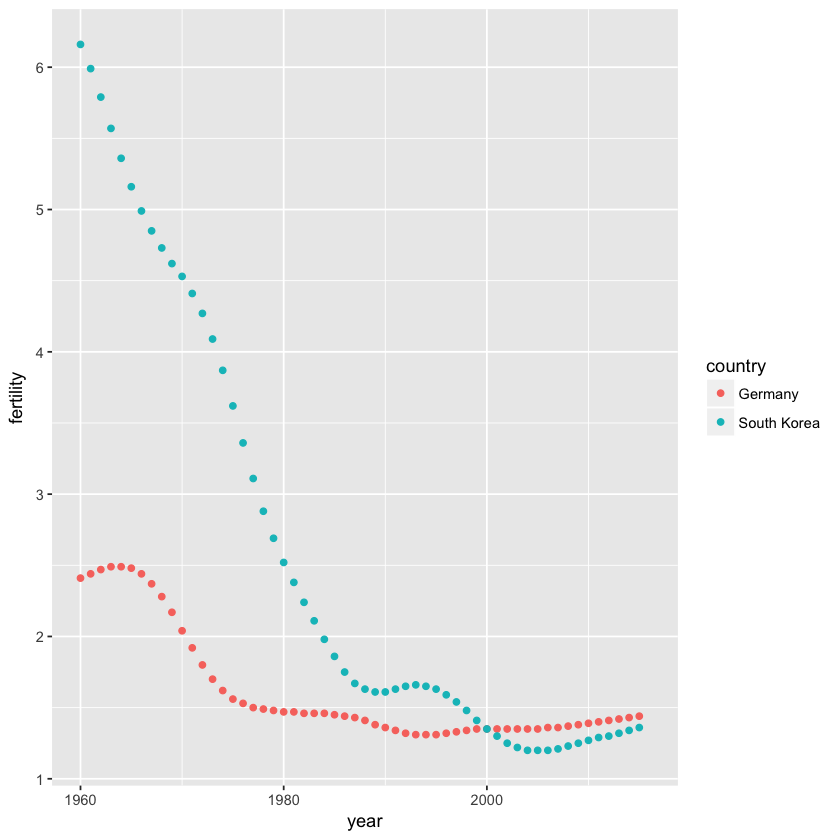

In [32]:
tidy_data %>%
    ggplot(aes(year, fertility, color= country)) +
    geom_point()

** Now, let's see the original gapminder raw data **

In [35]:
path <- system.file("extdata", package = "dslabs")
filename <- file.path(path, "fertility-two-countries-example.csv")
wide_data <- read_csv(filename)

head(wide_data)

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character()
)
See spec(...) for full column specifications.


country,1960,1961,1962,1963,1964,1965,1966,1967,1968,⋯,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37,2.28,⋯,1.36,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85,4.73,⋯,1.20,1.21,1.23,1.25,1.27,1.29,1.30,1.32,1.34,1.36


In [36]:
select(wide_data, country, '1960':'1967')

country,1960,1961,1962,1963,1964,1965,1966,1967
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85


We will need to wrangle this data from it's current format into a tidy format using `gather()` which converts wide data into tidy data

In [48]:
new_tidy_data <- wide_data %>% 
    gather(key = year, value = fertility, '1960':'2015')
head(new_tidy_data)

country,year,fertility
Germany,1960,2.41
South Korea,1960,6.16
Germany,1961,2.44
South Korea,1961,5.99
Germany,1962,2.47
South Korea,1962,5.79


A simpler way to write it to use the columns that we do not want to gather, we do this using `-` minus sign to indicate **ignore**

In [49]:
new_tidy_data2 <- wide_data %>% 
    gather(key = year, value = fertility, -country)
head(new_tidy_data2)

country,year,fertility
Germany,1960,2.41
South Korea,1960,6.16
Germany,1961,2.44
South Korea,1961,5.99
Germany,1962,2.47
South Korea,1962,5.79


Show the difference between the two objects

In [50]:
class(new_tidy_data$year)
class(new_tidy_data2$year)
class(tidy_data$year)

[1] "character"

[1] "character"

[1] "integer"

`year` is a character because `gather()` assumes column names are characters. We can fix this using `convert`. For plotting purposes we will need to convert `year` from `character` to `integer`

In [51]:
new_tidy_data3 <- wide_data %>% 
    gather(key = year, value = fertility, -country, convert = TRUE)

head(new_tidy_data3)
class(new_tidy_data3$year)

country,year,fertility
Germany,1960,2.41
South Korea,1960,6.16
Germany,1961,2.44
South Korea,1961,5.99
Germany,1962,2.47
South Korea,1962,5.79


[1] "integer"

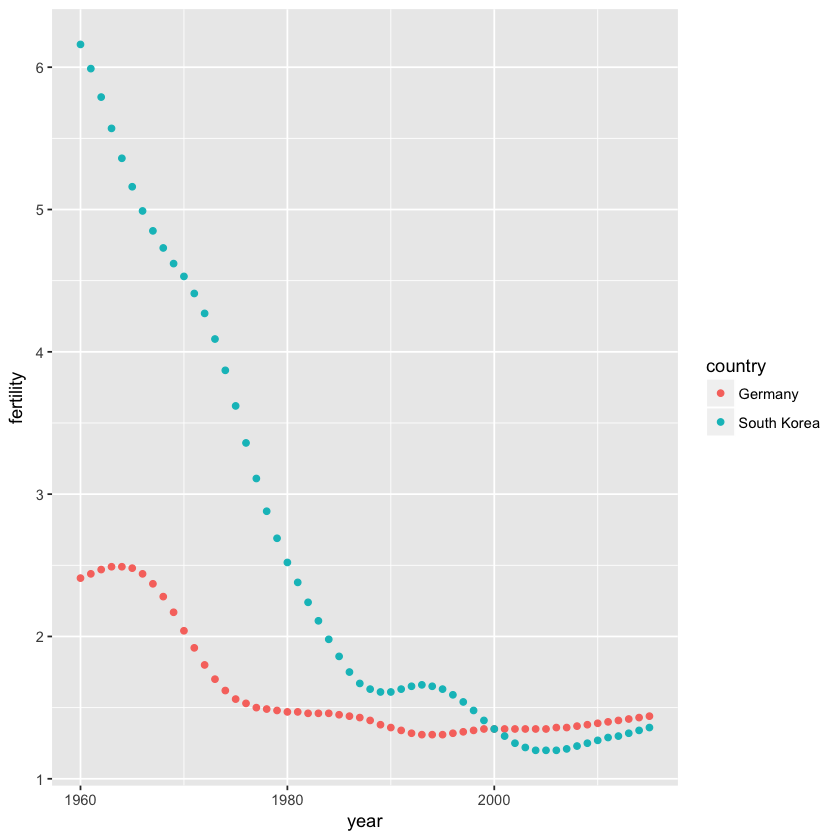

In [52]:
new_tidy_data3 %>% 
    ggplot(aes(year, fertility, color= country)) + 
    geom_point()

`spread()` is the inverse function of `gather()`

In [55]:
new_wide_data <- new_tidy_data3 %>% 
    spread(year, fertility)

new_wide_data
select(new_wide_data, country, '1960':'1970')

country,1960,1961,1962,1963,1964,1965,1966,1967,1968,⋯,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37,2.28,⋯,1.36,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85,4.73,⋯,1.20,1.21,1.23,1.25,1.27,1.29,1.30,1.32,1.34,1.36


country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37,2.28,2.17,2.04
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85,4.73,4.62,4.53


** more complex example **

In [61]:
filename <- file.path(path, "life-expectancy-and-fertility-two-countries-example.csv")
raw_dat <- read_csv(filename)
select(raw_dat, 1:5) 

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character()
)
See spec(...) for full column specifications.


country,1960_fertility,1960_life_expectancy,1961_fertility,1961_life_expectancy
Germany,2.41,69.26,2.44,69.85
South Korea,6.16,53.02,5.99,53.75


** First Step - let's gather the data using `gather()`**

In [62]:
dat6 <- raw_dat %>% 
    gather(key, value, -country)

head(dat6)

country,key,value
Germany,1960_fertility,2.41
South Korea,1960_fertility,6.16
Germany,1960_life_expectancy,69.26
South Korea,1960_life_expectancy,53.02
Germany,1961_fertility,2.44
South Korea,1961_fertility,5.99


** Second step - let's separate the key column into year and variable name using `separate()` **

In [63]:
dat6$key[1:5]

[1] "1960_fertility"       "1960_fertility"       "1960_life_expectancy"
[4] "1960_life_expectancy" "1961_fertility"

In [67]:
dat6 %>% 
    separate(key, c("year", "variable_name"), "_")

Warning message:
“Expected 2 pieces. Additional pieces discarded in 112 rows [3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 23, 24, 27, 28, 31, 32, 35, 36, 39, 40, ...].”

country,year,variable_name,value
Germany,1960,fertility,2.41
South Korea,1960,fertility,6.16
Germany,1960,life,69.26
South Korea,1960,life,53.02
Germany,1961,fertility,2.44
South Korea,1961,fertility,5.99
Germany,1961,life,69.85
South Korea,1961,life,53.75
Germany,1962,fertility,2.47
South Korea,1962,fertility,5.79


We don't need to use `_` since it is the default separater

In [68]:
dat6 %>% 
    separate(key, c("year", "variable_name"))

Warning message:
“Expected 2 pieces. Additional pieces discarded in 112 rows [3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 23, 24, 27, 28, 31, 32, 35, 36, 39, 40, ...].”

country,year,variable_name,value
Germany,1960,fertility,2.41
South Korea,1960,fertility,6.16
Germany,1960,life,69.26
South Korea,1960,life,53.02
Germany,1961,fertility,2.44
South Korea,1961,fertility,5.99
Germany,1961,life,69.85
South Korea,1961,life,53.75
Germany,1962,fertility,2.47
South Korea,1962,fertility,5.79


Still, not quite there. To fix this we will fill the column with NA

In [69]:
dat6 %>% 
    separate(key, c("year", "first_variable_name", "second_variable_name"), fill = "right")

country,year,first_variable_name,second_variable_name,value
Germany,1960,fertility,NA,2.41
South Korea,1960,fertility,NA,6.16
Germany,1960,life,expectancy,69.26
South Korea,1960,life,expectancy,53.02
Germany,1961,fertility,NA,2.44
South Korea,1961,fertility,NA,5.99
Germany,1961,life,expectancy,69.85
South Korea,1961,life,expectancy,53.75
Germany,1962,fertility,NA,2.47
South Korea,1962,fertility,NA,5.79


A better option is using `extra= 'merge'`

In [70]:
dat6 %>% separate(key, c("year", "variable_name"), sep = "_", extra = "merge")

country,year,variable_name,value
Germany,1960,fertility,2.41
South Korea,1960,fertility,6.16
Germany,1960,life_expectancy,69.26
South Korea,1960,life_expectancy,53.02
Germany,1961,fertility,2.44
South Korea,1961,fertility,5.99
Germany,1961,life_expectancy,69.85
South Korea,1961,life_expectancy,53.75
Germany,1962,fertility,2.47
South Korea,1962,fertility,5.79


** Third step - we now use the `spread()` function **

In [71]:
dat6 %>% 
  separate(key, c("year", "variable_name"), sep = "_", extra = "merge") %>%
  spread(variable_name, value)

country,year,fertility,life_expectancy
Germany,1960,2.41,69.26
Germany,1961,2.44,69.85
Germany,1962,2.47,70.01
Germany,1963,2.49,70.10
Germany,1964,2.49,70.66
Germany,1965,2.48,70.65
Germany,1966,2.44,70.77
Germany,1967,2.37,70.99
Germany,1968,2.28,70.64
Germany,1969,2.17,70.48


Another approach that combines these steps

In [72]:
dat6 %>%
  separate(key, c("year", "first_variable_name", "second_variable_name"), fill = "right") %>%
  unite(variable_name, first_variable_name, second_variable_name, sep = "_") %>%
  spread(variable_name, value) %>%
  rename(fertility = fertility_NA)

country,year,fertility,life_expectancy
Germany,1960,2.41,69.26
Germany,1961,2.44,69.85
Germany,1962,2.47,70.01
Germany,1963,2.49,70.10
Germany,1964,2.49,70.66
Germany,1965,2.48,70.65
Germany,1966,2.44,70.77
Germany,1967,2.37,70.99
Germany,1968,2.28,70.64
Germany,1969,2.17,70.48


### Combining Tables
The joins in the package are based on the SQL joins

In [73]:
data(murders)
head(murders)

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [78]:
data(polls_us_election_2016)
head(results_us_election_2016)

state,electoral_votes,clinton,trump,others
Alabama,9,34.4,62.1,3.6
Alaska,3,36.6,51.3,12.2
Arizona,11,45.1,48.7,6.2
Arkansas,6,33.7,60.6,5.8
California,55,61.7,31.6,6.7
Colorado,9,48.2,43.3,8.6


Joining the tables as they are will not work since the states are not in the same order

In [79]:
identical(results_us_election_2016$state, murders$state)

[1] FALSE

In [82]:
identical(c(1, 3, 2), c(1, 2, 3)) #not in the same order

[1] FALSE

In [84]:
tab <- left_join(murders, results_us_election_2016, by = "state")
head(tab)

state,abb,region,population,total,electoral_votes,clinton,trump,others
Alabama,AL,South,4779736,135,9,34.4,62.1,3.6
Alaska,AK,West,710231,19,3,36.6,51.3,12.2
Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8
California,CA,West,37253956,1257,55,61.7,31.6,6.7
Colorado,CO,West,5029196,65,9,48.2,43.3,8.6


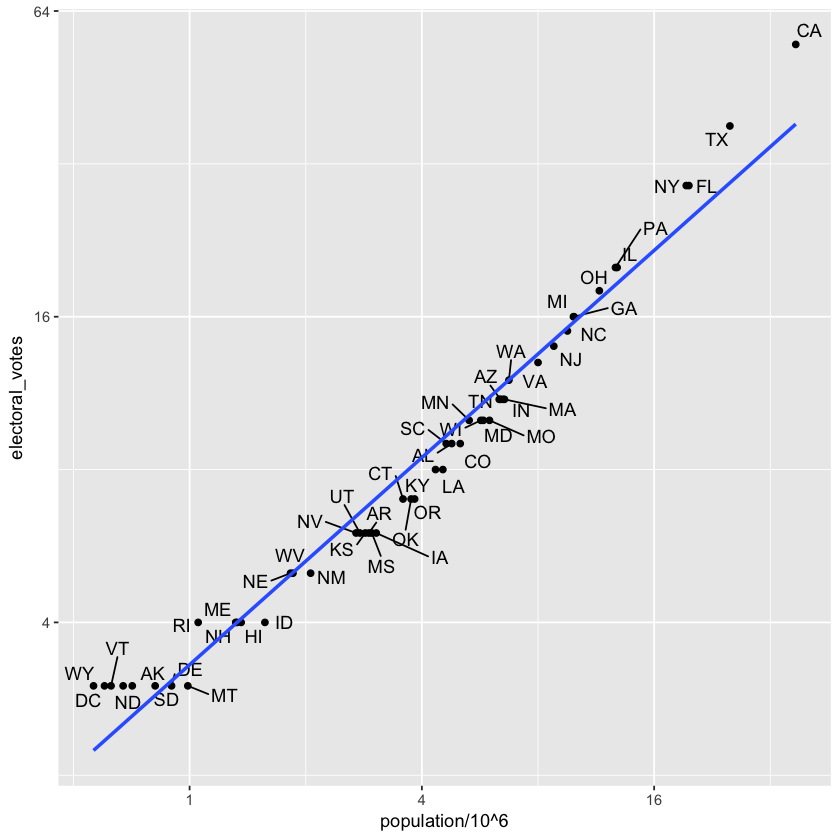

In [99]:
library(ggrepel)
tab %>% ggplot(aes(population/10^6, electoral_votes, label = abb)) +
    geom_point() +
    geom_text_repel() +
    scale_x_continuous(trans = "log2") + 
    scale_y_continuous(trans = "log2") + 
    geom_smooth(method = 'lm', se = FALSE)

<a id="joins"></a>
** Different ways to join **  
The two datasets below have different states for demonstration purposes  

<img src='6.png'>

In [120]:
tab1 <- slice(murders, 1:6) %>%
    select(state, population)
tab1
dim(tab1)

state,population
Alabama,4779736
Alaska,710231
Arizona,6392017
Arkansas,2915918
California,37253956
Colorado,5029196


[1] 6 2

In [119]:
tab2 <- slice(results_us_election_2016, c(1:3, 5, 7:8)) %>%
    select(state, electoral_votes)
tab2
dim(tab2)

state,electoral_votes
Alabama,9
Alaska,3
Arizona,11
California,55
Connecticut,7
Delaware,3


[1] 6 2

In [107]:
# left_join
left_join(tab1, tab2)

Joining, by = "state"


state,population,electoral_votes
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,NA
California,37253956,55
Colorado,5029196,NA


another way to write is using `%>%` pipe 

In [108]:
#left_join
tab1 %>% left_join(tab2)

Joining, by = "state"


state,population,electoral_votes
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,NA
California,37253956,55
Colorado,5029196,NA


In [109]:
#right_join
tab1 %>% right_join(tab2)

Joining, by = "state"


state,population,electoral_votes
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
California,37253956,55
Connecticut,NA,7
Delaware,NA,3


In [113]:
#inner_join
tab1 %>% inner_join(tab2)
# inner_join(tab1, tab2)

Joining, by = "state"


state,population,electoral_votes
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
California,37253956,55


In [115]:
# full_join
tab1 %>% full_join(tab2)

#full_join(tab1, tab2)

Joining, by = "state"


state,population,electoral_votes
Alabama,4779736,9
Alaska,710231,3
Arizona,6392017,11
Arkansas,2915918,NA
California,37253956,55
Colorado,5029196,NA
Connecticut,NA,7
Delaware,NA,3


`semi_join()`

In [116]:
semi_join(tab1, tab2)

Joining, by = "state"


state,population
Alabama,4779736
Alaska,710231
Arizona,6392017
California,37253956


`anti_join()` function is the opposit of `semi_join()`

In [117]:
anti_join(tab1, tab2)

Joining, by = "state"


state,population
Arkansas,2915918
Colorado,5029196


### Binding
Another way to combine datasets is by binding them. Unlike `join` functions, binding does not attemp to match by a varibale rather just combinse the datasets.    

Difference between `join` and `bind` functions:
* Binding functions combine by posiiton, while join functions match by variables
* Joining functions can join datasets of different dimensions, but the bind functions must match on the appropriate dimension (either same row or column numbers)
* Bind functions can combine both vectors and dataframes, while join functions work only for dataframes

`bind_cols()` combines into a tibble.  
`cbind()` creates objects other than tibbles

In [121]:
bind_cols(a = 1:3, b = 4:6)

a,b
1,4
2,5
3,6


In [127]:
tab1 <- tab[, 1:3]
tab2 <- tab[, 4:6]
tab3 <- tab[, 7:9]

new_tab <- bind_cols(tab1, tab2, tab3)

head(tab1)
head(tab2)
head(tab3)
head(new_tab)


state,abb,region
Alabama,AL,South
Alaska,AK,West
Arizona,AZ,West
Arkansas,AR,South
California,CA,West
Colorado,CO,West


population,total,electoral_votes
4779736,135,9
710231,19,3
6392017,232,11
2915918,93,6
37253956,1257,55
5029196,65,9


clinton,trump,others
34.4,62.1,3.6
36.6,51.3,12.2
45.1,48.7,6.2
33.7,60.6,5.8
61.7,31.6,6.7
48.2,43.3,8.6


state,abb,region,population,total,electoral_votes,clinton,trump,others
Alabama,AL,South,4779736,135,9,34.4,62.1,3.6
Alaska,AK,West,710231,19,3,36.6,51.3,12.2
Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8
California,CA,West,37253956,1257,55,61.7,31.6,6.7
Colorado,CO,West,5029196,65,9,48.2,43.3,8.6


`bind_rows()` binds rows instead of columns. `bind_rows()` is also based on an r base function called `rbind()`

In [131]:
tab1 <- tab[1:2, ]
tab2 <- tab[3:4, ]

tab1
tab2

state,abb,region,population,total,electoral_votes,clinton,trump,others
Alabama,AL,South,4779736,135,9,34.4,62.1,3.6
Alaska,AK,West,710231,19,3,36.6,51.3,12.2


,state,abb,region,population,total,electoral_votes,clinton,trump,others
3,Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
4,Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8


In [132]:
bind_rows(tab1, tab2)

state,abb,region,population,total,electoral_votes,clinton,trump,others
Alabama,AL,South,4779736,135,9,34.4,62.1,3.6
Alaska,AK,West,710231,19,3,36.6,51.3,12.2
Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8


### Set Operators  

`union()`  
`intersect()`  

If `tidyvere` and more specifically `dplyr` is loaded these functions work on vectors and dataframes as opposed to only vectors

** Interect **

In [133]:
#works on numeric vectors
intersect(1:10, 6:15)

[1]  6  7  8  9 10

In [134]:
#works on character vectors
intersect(c("a","b", "c"), c("b", "c", "d"))

[1] "b" "c"

Whebn `dplyr` is loaded we can use these functions with tables. Example taking interection of rows for tables having the same column names.

In [136]:
tab1 <- tab[1:5, ]
tab2 <- tab[3:7, ]

intersect(tab1, tab2)

state,abb,region,population,total,electoral_votes,clinton,trump,others
Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8
California,CA,West,37253956,1257,55,61.7,31.6,6.7


** Union **

In [137]:
union(1:10, 6:15)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

In [138]:
union(c("a","b", "c"), c("b", "c", "d"))

[1] "a" "b" "c" "d"

In [139]:
tab1 <- tab[1:5, ]
tab2 <- tab[3:7, ]

union(tab1, tab2)

state,abb,region,population,total,electoral_votes,clinton,trump,others
Connecticut,CT,Northeast,3574097,97,7,54.6,40.9,4.5
Colorado,CO,West,5029196,65,9,48.2,43.3,8.6
California,CA,West,37253956,1257,55,61.7,31.6,6.7
Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8
Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
Alaska,AK,West,710231,19,3,36.6,51.3,12.2
Alabama,AL,South,4779736,135,9,34.4,62.1,3.6


** `setdiff()` **  
Unlike `interect()` and `union()` this function is not symmetric.

In [140]:
# you get two different answers if you switch the arguments
setdiff(1:10, 6:15)

[1] 1 2 3 4 5

In [142]:
setdiff(6:15, 1:10)

[1] 11 12 13 14 15

In [145]:
tab1 <- tab[1:5, ]
tab2 <- tab[3:7, ]

setdiff(tab1, tab2)

state,abb,region,population,total,electoral_votes,clinton,trump,others
Alabama,AL,South,4779736,135,9,34.4,62.1,3.6
Alaska,AK,West,710231,19,3,36.6,51.3,12.2


In [144]:
setdiff(tab2, tab1)

state,abb,region,population,total,electoral_votes,clinton,trump,others
Colorado,CO,West,5029196,65,9,48.2,43.3,8.6
Connecticut,CT,Northeast,3574097,97,7,54.6,40.9,4.5


** `setequal()` **  
tells us if two sets are the same regardless of order.

In [146]:
setequal(1:5, 1:6)

[1] FALSE

In [147]:
setequal(1:5, 5:1)

[1] TRUE

In [150]:
setequal(tab1, tab2)

FALSE: Rows in x but not y: 2, 1. Rows in y but not x: 5, 4. 

In [151]:
tab1
tab2

state,abb,region,population,total,electoral_votes,clinton,trump,others
Alabama,AL,South,4779736,135,9,34.4,62.1,3.6
Alaska,AK,West,710231,19,3,36.6,51.3,12.2
Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8
California,CA,West,37253956,1257,55,61.7,31.6,6.7


,state,abb,region,population,total,electoral_votes,clinton,trump,others
3,Arizona,AZ,West,6392017,232,11,45.1,48.7,6.2
4,Arkansas,AR,South,2915918,93,6,33.7,60.6,5.8
5,California,CA,West,37253956,1257,55,61.7,31.6,6.7
6,Colorado,CO,West,5029196,65,9,48.2,43.3,8.6
7,Connecticut,CT,Northeast,3574097,97,7,54.6,40.9,4.5


<a id='web'></a>
## Web Scraping
[Top](#top)  
using library `rvest` part of the `tidyverse` package

In [6]:
library(rvest)

Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:purrr’:

    pluck

The following object is masked from ‘package:readr’:

    guess_encoding



In [7]:
url <- "https://en.wikipedia.org/wiki/Murder_in_the_United_States_by_state"
h <- read_html(url)

In [8]:
class(h)

[1] "xml_document" "xml_node"

In [178]:
h

{xml_document}
<html class="client-nojs" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject  ...

`html_nodes()` extract all specified html nodes (tags)

In [179]:
tab <- h %>% html_nodes("table")
tab <- tab[[2]]
tab

{xml_node}
<table class="wikitable sortable">
 [1] <tr>\n<th data-sort-type="text">State</th>\n<th data-sort-type="number"> ...
 [2] <tr>\n<td><a href="/wiki/Alabama" title="Alabama">Alabama</a></td>\n<td  ...
 [3] <tr>\n<td><a href="/wiki/Alaska" title="Alaska">Alaska</a></td>\n<td sty ...
 [4] <tr>\n<td><a href="/wiki/Arizona" title="Arizona">Arizona</a></td>\n<td  ...
 [5] <tr>\n<td><a href="/wiki/Arkansas" title="Arkansas">Arkansas</a></td>\n< ...
 [6] <tr>\n<td><a href="/wiki/California" title="California">California</a></ ...
 [7] <tr>\n<td><a href="/wiki/Colorado" title="Colorado">Colorado</a></td>\n< ...
 [8] <tr>\n<td><a href="/wiki/Connecticut" title="Connecticut">Connecticut</a ...
 [9] <tr>\n<td><a href="/wiki/Delaware" title="Delaware">Delaware</a></td>\n< ...
[10] <tr>\n<td><a href="/wiki/District_of_Columbia" class="mw-redirect" title ...
[11] <tr>\n<td><a href="/wiki/Florida" title="Florida">Florida</a></td>\n<td  ...
[12] <tr>\n<td><a href="/wiki/Georgia_(U.S._state)" 

`html_table` function converts HTML table to a dataframe

In [180]:
tab <- tab %>% html_table
class(tab)

[1] "data.frame"

In [181]:
head(tab)

State,Population(total inhabitants)(2015) [2],Murders and Nonnegligent Manslaughter(total deaths)(2015) [1],Murders(total deaths)(2015) [3],Gun Murders(total deaths)(2015) [3],Gun Ownership(%)(2013) [4],"Murder and Nonnegligent Manslaughter Rate(per 100,000)(2015)","Murder Rate(per 100,000)(2015)","Gun Murder Rate(per 100,000)(2015)"
Alabama,"4,853,875",348,3[a],3[a],48.9,7.2,0.1[a],0.1[a]
Alaska,"737,709",59,57,39,61.7,8.0,7.7,5.3
Arizona,"6,817,565",309,278,171,32.3,4.5,4.1,2.5
Arkansas,"2,977,853",181,164,110,57.9,6.1,5.5,3.7
California,"38,993,940","1,861","1,861","1,275",20.1,4.8,4.8,3.3
Colorado,"5,448,819",176,176,115,34.3,3.2,3.2,2.1


Update column names

In [204]:
tab <- tab %>% setNames(c("state", "population", "total", "murders", "gun_murders", "gun_ownership", "total_rate", "murder_rate","gun_murder_rate"))
head(tab)

state,population,total,murders,gun_murders,gun_ownership,total_rate,murder_rate,gun_murder_rate
Alabama,"4,853,875",348,3[a],3[a],48.9,7.2,0.1[a],0.1[a]
Alaska,"737,709",59,57,39,61.7,8.0,7.7,5.3
Arizona,"6,817,565",309,278,171,32.3,4.5,4.1,2.5
Arkansas,"2,977,853",181,164,110,57.9,6.1,5.5,3.7
California,"38,993,940","1,861","1,861","1,275",20.1,4.8,4.8,3.3
Colorado,"5,448,819",176,176,115,34.3,3.2,3.2,2.1


** Food Network Example - extract recipe **

In [197]:
h <- read_html("http://www.foodnetwork.com/recipes/alton-brown/guacamole-recipe-1940609")
recipe <- h %>% html_node(".o-AssetTitle__a-HeadlineText") %>% html_text()
prep_time <- h %>% html_node(".o-RecipeInfo__a-Description--Total") %>% html_text()
ingredients <- h %>% html_nodes(".o-Ingredients__a-ListItemText") %>% html_text()

In [198]:
recipe

[1] "Guacamole"

In [199]:
prep_time

[1] "1 hr 20 min"

In [200]:
ingredients

[1] "3 Haas avocados, halved, seeded and peeled"
 [2] "1 lime, juiced"                            
 [3] "1/2 teaspoon kosher salt"                  
 [4] "1/2 teaspoon ground cumin"                 
 [5] "1/2 teaspoon cayenne"                      
 [6] "1/2 medium onion, diced"                   
 [7] "1/2 jalapeno pepper, seeded and minced"    
 [8] "2 Roma tomatoes, seeded and diced"         
 [9] "1 tablespoon chopped cilantro"             
[10] "1 clove garlic, minced"

In [201]:
guacamole <- list(recipe, prep_time, ingredients)
guacamole

[[1]]
[1] "Guacamole"

[[2]]
[1] "1 hr 20 min"

[[3]]
 [1] "3 Haas avocados, halved, seeded and peeled"
 [2] "1 lime, juiced"                            
 [3] "1/2 teaspoon kosher salt"                  
 [4] "1/2 teaspoon ground cumin"                 
 [5] "1/2 teaspoon cayenne"                      
 [6] "1/2 medium onion, diced"                   
 [7] "1/2 jalapeno pepper, seeded and minced"    
 [8] "2 Roma tomatoes, seeded and diced"         
 [9] "1 tablespoon chopped cilantro"             
[10] "1 clove garlic, minced"

Since recipe pages from this website follow this general layout, we can use this code to create a function that extracts this information and then use it on any of their webpages:

In [9]:
get_recipe <- function(url){
    h <- read_html(url)
    recipe <- h %>% html_node(".o-AssetTitle__a-HeadlineText") %>% html_text()
    prep_time <- h %>% html_node(".o-RecipeInfo__a-Description--Total") %>% html_text()
    ingredients <- h %>% html_nodes(".o-Ingredients__a-ListItemText") %>% html_text()
    return(list(recipe = recipe, prep_time = prep_time, ingredients = ingredients))
}

get_recipe("http://www.foodnetwork.com/recipes/food-network-kitchen/pancakes-recipe-1913844")

$recipe
[1] "Pancakes"

$prep_time
[1] "22 min"

$ingredients
[1] "1 1/2 cups all-purpose flour"                      
[2] "3 tablespoons sugar"                               
[3] "1 tablespoon baking powder"                        
[4] "1/4 teaspoon salt"                                 
[5] "1/8 teaspoon freshly ground nutmeg"                
[6] "2 large eggs, at room temperature"                 
[7] "1 1/4 cups milk, at room temperature"              
[8] "1/2 teaspoon pure vanilla extract"                 
[9] "3 tablespoons unsalted butter, plus more as needed"

<a id="string"></a>
## String Processing
[Top](#top)

### String Parsing

In [10]:
url <- "https://en.wikipedia.org/wiki/Murder_in_the_United_States_by_state"
murders_raw <- read_html(url) %>%
        html_nodes("table") %>%
        html_table()

murders_raw <- murders_raw[[2]] %>%
        setNames(c("state", "population", "total", "murders", "gun_murders", "gun_ownership", "total_rate", "murder_rate","gun_murder_rate"))

head(murders_raw)

state,population,total,murders,gun_murders,gun_ownership,total_rate,murder_rate,gun_murder_rate
Alabama,"4,853,875",348,3[a],3[a],48.9,7.2,0.1[a],0.1[a]
Alaska,"737,709",59,57,39,61.7,8.0,7.7,5.3
Arizona,"6,817,565",309,278,171,32.3,4.5,4.1,2.5
Arkansas,"2,977,853",181,164,110,57.9,6.1,5.5,3.7
California,"38,993,940","1,861","1,861","1,275",20.1,4.8,4.8,3.3
Colorado,"5,448,819",176,176,115,34.3,3.2,3.2,2.1


two of the columns that we expected to contain numbers actually contain characters

In [11]:
class(murders_raw$population)
class(murders_raw$total)


[1] "character"

[1] "character"

In [12]:
murders_raw$population[1:5]
parse_number(murders_raw$population[1:5])

[1] "4,853,875"  "737,709"    "6,817,565"  "2,977,853"  "38,993,940"

[1]  4853875   737709  6817565  2977853 38993940

** Single and Double Quotes and How to Escape **

In [16]:
s <- '10"' #10 inches
s

[1] "10\""

In [17]:
cat(s)

10"

In [18]:
#5 feet
s <- "5'"
s

[1] "5'"

In [19]:
cat(s)

5'

In [20]:
# using escape \
s <- '5\'10"'
s

[1] "5'10\""

In [23]:
cat(s) #5 feet and 10 inches

5'10"

In [24]:
s <- "5'10\""
cat(s)

5'10"

** `stringr` package **

In [25]:
murders_raw$population[1:3]

[1] "4,853,875" "737,709"   "6,817,565"

In [27]:
# we get NA because of the commas in the text
as.numeric(murders_raw$population[1:3])

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] NA NA NA

We need to remove the patter `,` from the text

In [28]:
parse_number(murders_raw$population[1:3])

[1] 4853875  737709 6817565

** Advatages of using the `stringr` package over the strin processing functions in base R: **
* Functions in `stringr` all start with `str_`, which makes them easy to look up and using autocomplete
* `stringr` functions work better with pipes `%>%`
* The order of arguments is more consistent in `stringr` functions than in base R.

** `str_detect()`**  

In [31]:
commas <- function(x) any(str_detect(x, ","))
murders_raw %>% summarize_all(funs(commas))

state,population,total,murders,gun_murders,gun_ownership,total_rate,murder_rate,gun_murder_rate
FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE


In [33]:
str_detect(murders_raw$population[1:3], ",")

[1] TRUE TRUE TRUE

** `str_replace_all()` **

In [35]:
test_1 <- str_replace_all(murders_raw$population, ",", "")
test_1 <- as.numeric(test_1)#now we don't get an error any more

This task is so common in R (removing commas) that there is a dedicated function to do this directly using **`parse_number()`**

In [36]:
test_2 <- parse_number(murders_raw$population)
identical(test_1, test_2)

[1] TRUE

We can now apply this to the entire column

In [37]:
murders_raw <- murders_raw %>% mutate_at(2:3, parse_number)
murders_raw %>% head

state,population,total,murders,gun_murders,gun_ownership,total_rate,murder_rate,gun_murder_rate
Alabama,4853875,348,3[a],3[a],48.9,7.2,0.1[a],0.1[a]
Alaska,737709,59,57,39,61.7,8.0,7.7,5.3
Arizona,6817565,309,278,171,32.3,4.5,4.1,2.5
Arkansas,2977853,181,164,110,57.9,6.1,5.5,3.7
California,38993940,1861,"1,861","1,275",20.1,4.8,4.8,3.3
Colorado,5448819,176,176,115,34.3,3.2,3.2,2.1


In [38]:
parse_number(c('$128,568'))

[1] 128568

### Case Study 1: US Murders Data 
Question 1

In [280]:
test <- data.frame(Month=c('January', 'February', 'March', 'April', 'May'), Sales = c('$128,568', '$109,523', '$115,468', '$122,274', '$117,921'), Profit = c('$16,234', '$12,876', '$17,920', '$15,825', '$15,437'))

In [281]:
test

Month,Sales,Profit
January,"$128,568","$16,234"
February,"$109,523","$12,876"
March,"$115,468","$17,920"
April,"$122,274","$15,825"
May,"$117,921","$15,437"


In [282]:
test %>% mutate_at(2:3, parse_number)

Month,Sales,Profit
January,128568,16234
February,109523,12876
March,115468,17920
April,122274,15825
May,117921,15437


In [285]:
test %>% mutate_at(2:3, funs(str_replace_all(., c("\\$|,"), ""))) %>%  
mutate_at(2:3, as.numeric)

Month,Sales,Profit
January,128568,16234
February,109523,12876
March,115468,17920
April,122274,15825
May,117921,15437


In [283]:
test %>% mutate_at(2:3, as.numeric)

Month,Sales,Profit
January,5,4
February,1,1
March,2,5
April,4,3
May,3,2


In [284]:
test %>% mutate_all(parse_number)

Warning message:
“5 parsing failures.
row # A tibble: 5 x 4 col     row   col expected actual   expected   <int> <int> <chr>    <chr>    actual 1     1    NA a number January  row 2     2    NA a number February col 3     3    NA a number March    expected 4     4    NA a number April    actual 5     5    NA a number May     
”

Month,Sales,Profit
NA,128568,16234
NA,109523,12876
NA,115468,17920
NA,122274,15825
NA,117921,15437


In [68]:
test$Profit <- str_replace_all(test$Profit, c("\\$|,"), "") 
test$Sales <- parse_number(test$Sales)
test

Month,Sales,Profit
January,128568,16234
February,109523,12876
March,115468,17920


In [70]:
class(test$Profit)
class(test$Sales)

[1] "character"

[1] "numeric"

### Case Study 2: Reported Heights

In [71]:
#getting the raw data for the heights dataset
data(reported_heights)
head(reported_heights)

time_stamp,sex,height
2014-09-02 13:40:36,Male,75
2014-09-02 13:46:59,Male,70
2014-09-02 13:59:20,Male,68
2014-09-02 14:51:53,Male,74
2014-09-02 15:16:15,Male,61
2014-09-02 15:16:16,Female,65


In [78]:
class(reported_heights$height)

[1] "character"

In [79]:
as.numeric(reported_heights$height)
# we get a warning because we have non numeric characters in there 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1]    75.00000    70.00000    68.00000    74.00000    61.00000    65.00000
   [7]    66.00000    62.00000    66.00000    67.00000    72.00000     6.00000
  [13]    69.00000    68.00000    69.00000    66.00000    75.00000    64.00000
  [19]    60.00000    67.00000    66.00000          NA    70.00000    73.00000
  [25]    72.00000    69.00000    69.00000    72.00000    64.00000    72.00000
  [31]    75.00000    71.00000    67.00000    66.00000    67.00000    69.00000
  [37]    68.00000    66.75000    72.00000     5.30000    69.00000    68.00000
  [43]    63.00000    60.00000    73.00000    74.00000    74.00000    66.00000
  [49]    68.00000    73.00000    70.00000    68.00000    73.00000    70.50000
  [55]          NA    71.00000    70.00000    67.00000    69.00000    67.00000
  [61]    69.00000    73.00000    74.00000    70.00000    66.00000   511.00000
  [67]    72.00000    65.00000    65.00000    70.00000    73.00000    67.00000
  [73]    72.00000    68.00000    68.00000    65.00000    72.00000    71.00000
  [79]    65.00000    72.00000    69.00000    70.00000    72.00000     6.00000
  [85]    62.00000    65.00000    70.00000    60.00000    67.00000    62.00000
  [91]    71.00000    63.00000    68.00000    64.17320    64.00000    71.00000
  [97]    68.50000    62.00000     2.00000    70.00000    72.00000    71.00000
 [103]    71.00000    69.60000    65.00000    70.00000    61.00000    63.00000
 [109]    70.00000          NA    62.00000    68.00000    73.00000    66.50000
 [115]    69.00000    74.00000    71.50000    76.00000    69.00000    74.00000
 [121]    74.50000    69.00000    66.00000    64.00000    78.00000          NA
 [127]          NA    69.00000    67.00000    63.00000    74.00000    62.00000
 [133]    69.00000    64.00000    71.00000    62.50000    68.00000    67.00000
 [139]    71.00000    74.00000    75.00000    65.00000    68.00000    65.00000
 [145]    66.00000    72.00000    73.00000    71.00000    74.00000          NA
 [151]    73.00000    68.00000    77.00000    70.50000    63.00000    69.00000
 [157]    69.00000    68.89000    66.50000    64.17300    63.00000    65.00000
 [163]    64.00000    63.00000    63.00000    69.00000    69.00000    64.00000
 [169]    62.00000    70.00000    70.00000    59.00000    65.00000    67.70000
 [175]    72.00000    74.00000    71.70000    70.87000    66.00000    72.00000
 [181]    74.00000    69.00000    71.00000    70.00000    70.00000    64.00000
 [187]          NA    68.00000    66.00000    64.00000    67.00000    65.00000
 [193]    72.00000     5.25000    70.00000    64.57000    51.00000    63.00000
 [199]    70.00000    68.00000    67.00000          NA    69.00000    63.00000
 [205]    71.00000    70.00000    64.00000    70.00000    68.00000    66.00000
 [211]    69.00000    67.00000    65.00000    72.00000    72.00000    70.00000
 [217]    75.00000    64.00000    66.00000    68.00000    69.00000    73.00000
 [223]    66.00000    71.00000    67.00000    70.00000    67.00000    61.00000
 [229]    64.00000    64.00000     5.50000    72.00000    70.00000    65.00000
 [235] 11111.00000          NA    68.00000    67.00000    59.00000    59.00000
 [241]     6.00000     6.50000    72.00000   150.00000          NA    69.00000
 [247]    72.00000    69.00000    68.11000    68.11000    68.00000   103.20000
 [253]    65.00000    67.00000    67.00000    68.00000    69.00000    80.00000
 [259]     5.80000    68.00000    19.00000     5.00000    70.00000    60.00000
 [265]    60.00000    64.96000     5.60000   175.00000   177.00000   300.00000
 [271]    68.00000    70.00000    66.00000    66.00000          NA    72.00000
 [277]    68.00000          NA    72.05000    71.00000    72.50000    70.00000
 [283]    72.00000     6.00000    68.00000    70.00000     5.90000          NA
 [289]    68.00000    66.00000          NA     5.50000   178.00000    75.00000
 [295]    66.00000    69.00000    53.00000    71.00000    70.00000    72.00000
 [301]    68.50000    68.00000   163.00000    68.0000

In [83]:
#lets see how many NAs we are getting
x <- as.numeric(reported_heights$height)
head(x)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] 75 70 68 74 61 65

In [86]:
sum(is.na(x))

[1] 81

In [87]:
#use filter() to check on all entries that has a problem
reported_heights %>% 
    mutate(new_height = as.numeric(height)) %>%
    filter(is.na(new_height)) %>%
    head(n=10)

Warning message in evalq(as.numeric(height), <environment>):
“NAs introduced by coercion”

time_stamp,sex,height,new_height
2014-09-02 15:16:28,Male,"5' 4""",NA
2014-09-02 15:16:37,Female,165cm,NA
2014-09-02 15:16:52,Male,5'7,NA
2014-09-02 15:16:56,Male,>9000,NA
2014-09-02 15:16:56,Male,"5'7""",NA
2014-09-02 15:17:09,Female,"5'3""",NA
2014-09-02 15:18:00,Male,5 feet and 8.11 inches,NA
2014-09-02 15:19:48,Male,5'11,NA
2014-09-04 00:46:45,Male,5'9'',NA
2014-09-04 10:29:44,Male,5'10'',NA


We create a function to only keep entries that either result in NAs when applying as_numeric or are oustide a range of plausible heights

In [132]:
# ind will capture all NAs, values less than 50 and larger than 84
not_inches <- function(x, smallest = 50, tallest = 84) {
    inches <- suppressWarnings(as.numeric(x))
    ind <- is.na(inches) | inches < smallest | inches > tallest
    ind
}

`ind` is a logical vector of TRUE and FALSE, equal in length to the vector `x` (in the arguments list). TRUE indicates that ta height entry is incorrectly formatted.

In [144]:
not_inches(c(70))
not_inches(c(170))

[1] FALSE

[1] TRUE

In [130]:
problems <- reported_heights %>%
    filter(not_inches(height)) %>%
    .$height

length(problems)

[1] 292

In [109]:
head(problems, n = 15) 

[1] "6"                      "5' 4\""                 "5.3"                   
 [4] "165cm"                  "511"                    "6"                     
 [7] "2"                      "5'7"                    ">9000"                 
[10] "5'7\""                  "5'3\""                  "5 feet and 8.11 inches"
[13] "5.25"                   "5'11"                   "5.5"

We recognize common patterns that we can detect  

patterns like this  ** 1.x' or x' y" or x' y\" **

In [105]:
pattern <- "^\\d\\s*'\\s*\\d{1,2}\\.*\\d*'*\"*$"
str_subset(problems, pattern = pattern) %>% head(n=10) %>% cat

5' 4" 5'7 5'7" 5'3" 5'11 5'9'' 5'10'' 5' 10 5'5" 5'2"

patterns like this **x.y or x,y**

In [107]:
pattern <- "^[4-6]\\s*[\\. |,]\\s*([0-9]|10|11)$"
str_subset(problems, pattern = pattern) %>% head(n=10) %>% cat

5.3 5.5 6.5 5.8 5.6 5,3 5.9 6,8 5.5 6.2

Entires reported in centimeters

In [128]:
ind <- which(between(suppressWarnings(as.numeric(problems))/2.54, 54, 81))
ind <- ind[!is.na(ind)]
problems[ind] %>% head(n=10) %>% cat

150 175 177 178 163 175 178 165 165 180

<a id="regex"></a>
## Regex (Regular Expressions)
[Top](#top)
* `str_detect(x, pattern)`
* `str_subset(x, pattern)`

In [146]:
pattern <- ","
str_detect(murders_raw$total, pattern)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE

In [147]:
str_subset(reported_heights$height, "cm")

[1] "165cm"  "170 cm"

In [156]:
yes <- c("180 cm", "70 inches")
no <- c("180", "70''")
s <- c(yes, no)
s

[1] "180 cm"    "70 inches" "180"       "70''"

In [157]:
str_detect(s, "cm") | str_detect(s, "inches")

[1]  TRUE  TRUE FALSE FALSE

** `|` OR **

In [161]:
# a simpler way to represent the two scenarios via regex pattern
str_subset(s, "cm|inches")
str_detect(s, "cm|inches")

[1] "180 cm"    "70 inches"

[1]  TRUE  TRUE FALSE FALSE

** `\d` for any digit: 0,1,2,3,4,5,6,7,8,9 **  

note: in R we have to escape the backslash so we use double `\\d` 

In [163]:
yes <- c("5", "6", "5'10", "5 feet", "4'11")
no <- c("", ".", "Five", "six")
s <-c(yes, no)
s

[1] "5"      "6"      "5'10"   "5 feet" "4'11"   ""       "."      "Five"  
[9] "six"

In [167]:
pattern <- "\\d"
str_detect(s, pattern)
str_subset(s, pattern)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE

[1] "5"      "6"      "5'10"   "5 feet" "4'11"

** `str_view()` **   
This is a helpful function for troubleshooting, as it shows us the first match for each string.

In [168]:
str_view(s, pattern)

HTML widgets cannot be represented in plain text (need html)

** `str_view_all()`** shows us all the matches 

In [169]:
str_view_all(s, pattern)

HTML widgets cannot be represented in plain text (need html)

** Question **

In [172]:
s <- c("70", "5 ft", "4'11", ".", "Six feet")
s

[1] "70"       "5 ft"     "4'11"     "."        "Six feet"

In [173]:
pattern <- "\\d|ft"
str_view_all(s, pattern)

HTML widgets cannot be represented in plain text (need html)

### Character Classes, Anchors, and Qualifiers

In [176]:
#character classes
s <- c("5","6","5'10","5 feet", "4'11", ".", "Five", "six")
s

[1] "5"      "6"      "5'10"   "5 feet" "4'11"   "."      "Five"   "six"

In [179]:
str_view(s, "[56]")

HTML widgets cannot be represented in plain text (need html)

** `[0-9]` is equivalent to using `\\d` **

In [181]:
yes <- as.character(4:7)
no <- as.character(1:3)
s <- c(yes, no)

str_detect(s, "[4-7]")
str_view(s, "[4-7]")

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE

HTML widgets cannot be represented in plain text (need html)

**Note:** In RegEx everything is a character  
** Example:** `[1-20]` doesn't mean numbers from `1 to 20` rather it means characters `1 to 2`, and then the character `0`  

* `[a-z]` = all lowercase letters from a to z  
* `[A-Z]` = all uppercase letters from A to Z  
* `[a-zA-Z]` = all the letters   

**Anchors** lets us define patterns that must start or end at specific places. The two most common anchors are caret `^` and the `$`  


** Example:**  `^\\d$` means start of the string followed by 1 digit followed by the end of the string. This pattern will only detect the <u>strings that are exactly one digit</u>.

In [183]:
yes <- c("1", "5", "9")
no <- c("12", "123", " 1", "a4", "b")
s <- c(yes, no)

pattern <- "^\\d$"
str_view(s, pattern)

HTML widgets cannot be represented in plain text (need html)

** Quantifiers** this is done by following the patter by curly brackets `{}` with the possible number of times the previous entry repeats.  

**Example:** `\\d{1,2}` pattern for one or two digits

In [187]:
pattern <- "^\\d{1,2}$"
str_view(s, pattern)

HTML widgets cannot be represented in plain text (need html)

Construct pattern for Feet and Inches X'Y"

In [195]:
pattern <- "^[4-7]'\\d{1,2}\"$"


yes <- c("5'7\"", "6'2\"", "5'12\"")
no <- c("6,2\"", "6.2\"", "I am 5'11\"", "3'2\"", "64")
s <- c(yes, no)

In [196]:
str_detect(yes, pattern)

[1] TRUE TRUE TRUE

In [197]:
str_detect(no, pattern)

[1] FALSE FALSE FALSE FALSE FALSE

In [200]:
str_view_all(s, pattern)

HTML widgets cannot be represented in plain text (need html)

### Questions

In [201]:
animals <- c("cat", "puppy", "Moose", "MONKEY")
pattern <- "[a-z]"
str_detect(animals, pattern)

[1]  TRUE  TRUE  TRUE FALSE

In [202]:
pattern <- "[A-Z]$"
str_detect(animals, pattern)

[1] FALSE FALSE FALSE  TRUE

In [203]:
pattern <- "[a-z]{4,5}"
str_detect(animals, pattern)

[1] FALSE  TRUE  TRUE FALSE

<a id="search"></a>
### Search and Replace with RegEx  
`str_replace`

In [206]:
pattern <- "^[4-7]'\\d{1,2}\"$"
sum(str_detect(problems, pattern))

[1] 14

In [207]:
# to demonstrate why we don't have more matches 
problems[c(2, 10, 11, 12, 15)] %>% str_view(pattern)

HTML widgets cannot be represented in plain text (need html)

In [208]:
str_subset(problems, "inches")

[1] "5 feet and 8.11 inches" "Five foot eight inches" "5 feet 7inches"        
[4] "5ft 9 inches"           "5 ft 9 inches"          "5 feet 6 inches"

In [210]:
str_subset(problems, "''") %>% cat

5'9'' 5'10'' 5'10'' 5'3'' 5'7'' 5'6'' 5'7.5'' 5'7.5'' 5'10'' 5'11'' 5'10'' 5'5''

In [211]:
pattern <- "^[4-7]'\\d{1,2}$"
sum(str_detect(problems, pattern))

[1] 24

In [212]:
problems %>%
    str_replace("feet|ft|foot", "'") %>%
    str_replace("inches|in|''|\"", "") %>%
    str_detect(pattern) %>%
    sum

[1] 48

Check for character **space** using `\\s`

In [217]:
pattern_2 <- "^[4-7]'\\s\\d{1,2}\"$"
str_subset(problems, pattern_2)

[1] "5' 4\""  "5' 11\"" "5' 7\""

Other quantifiers:  

* `*` = zero or more instances
* `?` = None or once
* `+` = 1 or more

In [219]:
yes <- c("AB", "A1B", "A11B", "A111B", "A11111B")
no <- c("A2B", "A21B")
s <- c(yes, no)

str_detect(yes, "A1*B")

[1] TRUE TRUE TRUE TRUE TRUE

In [220]:
str_detect(no, "A1*B")

[1] FALSE FALSE

In [221]:
data.frame(string = c("AB", "A1B", "A11B", "A111B", "A11111B"), 
          none_or_more = str_detect(yes, "A1*B"),
          none_or_once = str_detect(yes, "A1?B"),
          once_or_more = str_detect(yes, "A1+B"))


string,none_or_more,none_or_once,once_or_more
AB,TRUE,TRUE,FALSE
A1B,TRUE,TRUE,TRUE
A11B,TRUE,FALSE,TRUE
A111B,TRUE,FALSE,TRUE
A11111B,TRUE,FALSE,TRUE


In [222]:
pattern <- "^[4-7]\\s*'\\s*\\d{1,2}$"
problems %>%
    str_replace("feet|ft|foot", "'") %>%
    str_replace("inches|in|''|\"", "") %>%
    str_detect(pattern) %>%
    sum

[1] 53

### Questions

In [224]:
schools <- c("U. Kentucky", "Univ New Hampshire", "Univ. of Massachusetts", "University Georgie", "U California", "Calfironia State University")
schools

[1] "U. Kentucky"                 "Univ New Hampshire"         
[3] "Univ. of Massachusetts"      "University Georgie"         
[5] "U California"                "Calfironia State University"

In [251]:
schools %>% 
   str_replace("^Univ\\.?\\s|^U\\.?\\s", "University ") %>% 
  str_replace("^University of |^University ", "University of ")
      

[1] "University of Kentucky"      "University of New Hampshire"
[3] "University of Massachusetts" "University of Georgie"      
[5] "University of California"    "Calfironia State University"

### Groups with RegEx

In [252]:
pattern_without_groups <- "^[4-7],\\d*$"
pattern_with_groups <- "^([4-7]),(\\d*)$"

In [253]:
yes <- c("5,9", "5,11", "6,", "6,1")
no <- c("5'9", ",", "2,8", "6.1.1")
s <- c(yes, no)

In [254]:
str_detect(s, pattern_without_groups)

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE

In [255]:
str_detect(s, pattern_with_groups)

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE

In [256]:
str_match(s, pattern_without_groups)

"5,9"
"5,11"
"6,"
"6,1"
NA
NA
NA
NA


`str_match()` vs `str_extract()`

In [257]:
str_match(s, pattern_with_groups)

"5,9",5,9
"5,11",5,11
"6,",6,
"6,1",6,1
NA,NA,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA


In [258]:
str_extract(s, pattern_with_groups)

[1] "5,9"  "5,11" "6,"   "6,1"  NA     NA     NA     NA

`\\i` is the i-th group

In [259]:
# \\1 values extracted from first group
# \\2 values extracted from second group

pattern_with_groups <- "^([4-7]),(\\d*)$"
yes <- c("5,9", "5,11", "6,", "6,1")
no <- c("5'9", ",", "2,8", "6.1.1")
s <- c(yes, no)

str_replace(s, pattern_with_groups, "\\1'\\2")

[1] "5'9"   "5'11"  "6'"    "6'1"   "5'9"   ","     "2,8"   "6.1.1"

Now, we can use pattern groups to handle these scenarios:

* x.y
* x,y
* x y

In [261]:
pattern_with_groups <- "^([4-7])\\s*[,\\.\\s+]\\s*(\\d*)$"

str_subset(problems, pattern_with_groups) %>% head

[1] "5.3"  "5.25" "5.5"  "6.5"  "5.8"  "5.6"

In [262]:
str_subset(problems, pattern_with_groups) %>% 
    str_replace(pattern_with_groups, "\\1'\\2") %>% head

[1] "5'3"  "5'25" "5'5"  "6'5"  "5'8"  "5'6"

** Question 1 **

In [263]:
problems <- c("5.3", "5,5", "6 1", "5 .11", "5, 12")
pattern_with_groups <- "^([4-7])[,\\.](\\d*)$"
str_replace(problems, pattern_with_groups, "\\1'\\2")

[1] "5'3"   "5'5"   "6 1"   "5 .11" "5, 12"

In [264]:
problems <- c("5.3", "5,5", "6 1", "5 .11", "5, 12")
pattern_with_groups <- "^([4-7])[,\\.\\s](\\d*)$"
str_replace(problems, pattern_with_groups, "\\1'\\2")

[1] "5'3"   "5'5"   "6'1"   "5 .11" "5, 12"

### Testing and Improving

In [290]:
not_inches_or_cm <- function(x, smallest = 50, tallest = 84) {
    inches <- suppressWarnings(as.numeric(x))
    ind <- !is.na(inches) &
        ((inches >= smallest & inches <= tallest) |
            (inches/2.54 >= smallest & inches/2.54 <= tallest))
    !ind
}

problems <- reported_heights %>%
    filter(not_inches_or_cm(height)) %>%
    .$height

length(problems)

[1] 200

In [301]:
converted <- problems %>%
    str_replace("feet|foot|ft", "'") %>% #convert feet symbols to '
    str_replace("inches|in|''|\"","") %>% #remove inches symbols
    str_replace("^([4-7])\\s*[,\\.\\s+]\\s*(\\d*)$", "\\1'\\2") #change format


In [302]:
pattern <- "^[4-7]\\s*'\\s*\\d{1,2}$"
index <- str_detect(converted, pattern)
mean(index)

[1] 0.615

We are matching around 61% , let's examine the remaining cases 

In [303]:
converted[!index]

[1] "6"             "165cm"         "511"           "6"            
 [5] "2"             ">9000"         "5 ' and 8.11 " "11111"        
 [9] "6"             "103.2"         "19"            "5"            
[13] "300"           "6'"            "6"             "Five ' eight "
[17] "7"             "214"           "6"             "0.7"          
[21] "6"             "2'33"          "612"           "1,70"         
[25] "87"            "5'7.5"         "5'7.5"         "111"          
[29] "5' 7.78"       "12"            "6"             "yyy"          
[33] "89"            "34"            "25"            "6"            
[37] "6"             "22"            "684"           "6"            
[41] "1"             "1"             "6*12"          "87"           
[45] "6"             "1.6"           "120"           "120"          
[49] "23"            "1.7"           "6"             "5"            
[53] "69"            "5' 9 "         "5 ' 9 "        "6"            
[57] "6"             "86"            "708,661"       "5 ' 6 "       
[61] "6"             "649,606"       "10000"         "1"            
[65] "728,346"       "0"             "6"             "6"            
[69] "6"             "100"           "88"            "6"            
[73] "170 cm"        "7,283,465"     "5"             "5"            
[77] "34"

** Questions **

The regex used in `str_replace` looks for either a comma, period or space between the feet and inches digits, while the `pattern` regex just looks for an apostrophe; the regex in `str_replace` allows for none or more digits to be entered as inches, while the `pattern` regex only allows for one or two digits

In [304]:
converted <- problems %>% 
  str_replace("feet|foot|ft", "'") %>% 
  str_replace("inches|in|''|\"", "") %>% 
  str_replace("^([4-7])\\s*[,\\.\\s+]\\s*(\\d*)$", "\\1'\\2")

pattern <- "^[4-7]\\s*'\\s*\\d{1,2}$"
index <- str_detect(converted, pattern)
converted[!index]

[1] "6"             "165cm"         "511"           "6"            
 [5] "2"             ">9000"         "5 ' and 8.11 " "11111"        
 [9] "6"             "103.2"         "19"            "5"            
[13] "300"           "6'"            "6"             "Five ' eight "
[17] "7"             "214"           "6"             "0.7"          
[21] "6"             "2'33"          "612"           "1,70"         
[25] "87"            "5'7.5"         "5'7.5"         "111"          
[29] "5' 7.78"       "12"            "6"             "yyy"          
[33] "89"            "34"            "25"            "6"            
[37] "6"             "22"            "684"           "6"            
[41] "1"             "1"             "6*12"          "87"           
[45] "6"             "1.6"           "120"           "120"          
[49] "23"            "1.7"           "6"             "5"            
[53] "69"            "5' 9 "         "5 ' 9 "        "6"            
[57] "6"             "86"            "708,661"       "5 ' 6 "       
[61] "6"             "649,606"       "10000"         "1"            
[65] "728,346"       "0"             "6"             "6"            
[69] "6"             "100"           "88"            "6"            
[73] "170 cm"        "7,283,465"     "5"             "5"            
[77] "34"

It seems like the problem may be due to spaces around the words feet|foot|ft and inches|in. What is another way you could fix this problem?

In [325]:
yes <- c("5 feet 7inches", "5 7")
no <- c("5ft 9 inches", "5 ft 9 inches")
s <- c(yes, no)

converted <- s %>% 
  str_replace("feet|foot|ft", "'") %>% 
  str_replace("inches|in|''|\"", "") %>% 
  str_replace("^([4-7])\\s*[,\\.\\s+]\\s*(\\d*)$", "\\1'\\2")

pattern <- "^[4-7]\\s*'\\s*\\d{1,2}$"
cat(converted)
str_detect(converted, pattern)
str_view_all(converted, pattern)

5 ' 7 5'7 5' 9  5 ' 9 

[1]  TRUE  TRUE FALSE FALSE

HTML widgets cannot be represented in plain text (need html)

You can add a none or more space character `(\\s*)` before and after each word to properly replace the word and any additional spaces with an apostrophe.

In [326]:
converted <- s %>% 
  str_replace("\\s*(feet|foot|ft)\\s*", "'") %>% 
  str_replace("\\s*(inches|in|''|\")\\s*", "") %>% 
  str_replace("^([4-7])\\s*[,\\.\\s+]\\s*(\\d*)$", "\\1'\\2")


pattern <- "^[4-7]\\s*'\\s*\\d{1,2}$"

cat(converted)
str_detect(converted, pattern)
str_view_all(converted, pattern)


5'7 5'7 5'9 5'9

[1] TRUE TRUE TRUE TRUE

HTML widgets cannot be represented in plain text (need html)

<a id="groups"></a>
## Using Groups and Quantifiers
[Top](#top)

Four clear patterns of entries have arisen along with some other minor problems:

1. Many students measuring exactly 5 or 6 feet did not enter any inches. For example, `6'` - our pattern requires that inches be included.
2. Some students measuring exactly 5 or 6 feet entered just that number.
3. Some of the inches were entered with decimal points. For example `5'7.5''`. Our pattern only looks for two digits.
4. Some entires have spaces at the end, for example `5 ' 9`.
5. Some entries are in meters and some of these use European decimals: `1.6`, `1,7`.
6. Two students added `cm`.
7. One student spelled out the numbers: `Five foot eight inches`.

It is not necessarily clear that it is worth writing code to handle all these cases since they might be rare enough. However, some give us an opportunity to learn some more regex techniques so we will build a fix.

#### Case 1

For case 1, if we add a `'0` to, for example, convert all `6` to `6'0`, then our pattern will match. This can be done using groups using the following code:

In [327]:
yes <- c("5", "6", "5")
no <- c("5'", "5''", "5'4")
s <- c(yes, no)
str_replace(s, "^([4-7])$", "\\1'0")

[1] "5'0" "6'0" "5'0" "5'"  "5''" "5'4"

The pattern says it has to start (`^`), be followed with a digit between 4 and 7, and then end there (`$`). The parenthesis defines the group that we pass as `\\1` to the replace regex.


#### Cases 2 and 4

We can adapt this code slightly to handle case 2 as well which covers the entry `5'`. Note that the `5'` is left untouched by the code above. This is because the extra `'` makes the pattern not match since we have to end with a 5 or 6. To handle case 2, we want to permit the 5 or 6 to be followed by no or one symbol for feet. So we can simply add `'{0,1}` after the `'` to do this. We can also use the none or once special character `?`. As we saw previously, this is different from `*` which is none or more. We now see that this code also handles the fourth case as well:

In [328]:
str_replace(s, "^([56])'?$", "\\1'0")

[1] "5'0" "6'0" "5'0" "5'0" "5''" "5'4"

Note that here we only permit 5 and 6 but not 4 and 7. This is because heights of exactly 5 and exactly 6 feet tall are quite common, so we assume those that typed 5 or 6 really meant either `60` or `72` inches. However, heights of exactly 4 or exactly 7 feet tall are so rare that, although we accept `84` as a valid entry, we assume that a 7 was entered in error.

#### Case 3

We can use quantifiers to deal with case 3. These entries are not matched because the inches include decimals and our pattern does not permit this. We need allow the second group to include decimals and not just digits. This means we must permit zero or one period `.` followed by zero or more digits. So we will use both `?` and `*`. Also remember that for this particular case, the period needs to be escaped since it is a special character (it means any character except a line break).

So we can adapt our pattern, currently `^[4-7]\\s*'\\s*\\d{1,2}$` to permit a decimal at the end:

In [329]:
pattern <- "^[4-7]\\s*'\\s*(\\d+\\.?\\d*)$"

#### Case 5

Case 5, meters using commas, we can approach similarly to how we converted the `x.y` to `x'y`. A difference is that we require that the first digit is 1 or 2:

In [330]:
yes <- c("1,7", "1, 8", "2, " )
no <- c("5,8", "5,3,2", "1.7")
s <- c(yes, no)
str_replace(s, "^([12])\\s*,\\s*(\\d*)$", "\\1\\.\\2")

[1] "1.7"   "1.8"   "2."    "5,8"   "5,3,2" "1.7"

#### Trimming

In general, spaces at the start or end of the string are uninformative. These can be particularly deceptive because sometimes they can be hard to see:

In [331]:
s <- "Hi "
cat(s)
identical(s, "Hi")

Hi 

[1] FALSE

This is a general enough problem that there is a function dedicated to removing them: `str_trim`.

#### To upper and to lower case

One of the entries writes out numbers as words: `Five foot eight inches`. Although not efficient, we could add 12 extra `str_replace` to convert `zero` to `0`, `one` to `1`, and so on. To avoid having to write two separate operations for `Zero` and `zero`, `One` and `one`, etc., we can use the `str_to_lower` function to make all words lower case first:

In [332]:
s <- c("Five feet eight inches")
str_to_lower(s)

[1] "five feet eight inches"

#### Putting it into a function

We are now ready to define a procedure that handles converting all the problematic cases.

We can now put all this together into a function that takes a string vector and tries to convert as many strings as possible to a single format. Below is a function that puts together the previous code replacements:

In [333]:
convert_format <- function(s){
  s %>%
    str_replace("feet|foot|ft", "'") %>% #convert feet symbols to '
    str_replace_all("inches|in|''|\"|cm|and", "") %>%  #remove inches and other symbols
    str_replace("^([4-7])\\s*[,\\.\\s+]\\s*(\\d*)$", "\\1'\\2") %>% #change x.y, x,y x y
    str_replace("^([56])'?$", "\\1'0") %>% #add 0 when to 5 or 6
    str_replace("^([12])\\s*,\\s*(\\d*)$", "\\1\\.\\2") %>% #change european decimal
    str_trim() #remove extra space
}

We can also write a function that converts words to numbers:

In [334]:
words_to_numbers <- function(s){
  str_to_lower(s) %>%  
    str_replace_all("zero", "0") %>%
    str_replace_all("one", "1") %>%
    str_replace_all("two", "2") %>%
    str_replace_all("three", "3") %>%
    str_replace_all("four", "4") %>%
    str_replace_all("five", "5") %>%
    str_replace_all("six", "6") %>%
    str_replace_all("seven", "7") %>%
    str_replace_all("eight", "8") %>%
    str_replace_all("nine", "9") %>%
    str_replace_all("ten", "10") %>%
    str_replace_all("eleven", "11")
}

In [335]:
converted <- problems %>% words_to_numbers %>% convert_format
remaining_problems <- converted[not_inches_or_cm(converted)]
pattern <- "^[4-7]\\s*'\\s*\\d+\\.?\\d*$"
index <- str_detect(remaining_problems, pattern)
remaining_problems[!index]

[1] "511"       "2"         ">9000"     "11111"     "103.2"     "19"       
 [7] "300"       "7"         "214"       "0.7"       "2'33"      "612"      
[13] "1.70"      "87"        "111"       "12"        "yyy"       "89"       
[19] "34"        "25"        "22"        "684"       "1"         "1"        
[25] "6*12"      "87"        "1.6"       "120"       "120"       "23"       
[31] "1.7"       "86"        "708,661"   "649,606"   "10000"     "1"        
[37] "728,346"   "0"         "100"       "88"        "7,283,465" "34"

** Examples using Extract **


In [348]:
s <- c("5'10", "6'1")
tab <- data.frame(x = s)
tab %>% separate(x, c("feet", "inches"), sep = "'")

feet,inches
5,10
6,1


In [349]:
#uasing extract
tab %>% extract(x, c("feet", "inches"), regex = "(\\d)'(\\d{1,2})")

feet,inches
5,10
6,1


`separate` here fails, while `extract` gives us more flexibility via regex

In [358]:
s <- c("5'10", "6'1\"", "5'8inches")
tab <- data.frame(x = s)

In [359]:
tab

x
5'10
"6'1"""
5'8inches


In [360]:
tab %>% separate(x, c("feet", "inches"), sep = "'", fill = "right")

feet,inches
5,10
6,"1"""
5,8inches


In [361]:
tab %>% extract(x, c("feet", "inches"), regex = "(\\d)'(\\d{1,2})")

feet,inches
5,10
6,1
5,8


** Questions **

In [363]:
s <- c("5'10", "6'1\"", "5'8inches", "5'7.5")
tab <- data.frame(x = s)

In this code, you extract three groups: one digit for “feet”, one or two digits for “inches”, and an optional decimal point followed by at least one digit for “decimal”

In [367]:
extract(data = tab, col = x, into = c("feet", "inches", "decimal"), 
regex = "(\\d)'(\\d{1,2})(\\.\\d+)?")

feet,inches,decimal
5,10,NA
6,1,NA
5,8,NA
5,7,.5


#### Putting it All Together

We are now ready to put everything we've done so far together and wrangle our reported heights data as we try to recover as many heights as possible. The code is complex but we will break it down into parts.

We start by cleaning up the `height` column so that the heights are closer to a feet'inches format. We added an original heights column so we can compare before and after.

Let's start by writing a function that cleans up strings so that all the feet and inches formats use the same x'y format when appropriate.

In [370]:
pattern <- "^([4-7])\\s*'\\s*(\\d+\\.?\\d*)$"

smallest <- 50
tallest <- 84
new_heights <- reported_heights %>% 
  mutate(original = height, 
         height = words_to_numbers(height) %>% convert_format()) %>%
  extract(height, c("feet", "inches"), regex = pattern, remove = FALSE) %>% 
  mutate_at(c("height", "feet", "inches"), as.numeric) %>%
  mutate(guess = 12*feet + inches) %>%
  mutate(height = case_when(
    !is.na(height) & between(height, smallest, tallest) ~ height, #inches 
    !is.na(height) & between(height/2.54, smallest, tallest) ~ height/2.54, #centimeters
    !is.na(height) & between(height*100/2.54, smallest, tallest) ~ height*100/2.54, #meters
    !is.na(guess) & inches < 12 & between(guess, smallest, tallest) ~ guess, #feet'inches
    TRUE ~ as.numeric(NA))) %>%
  select(-guess)

Warning message in evalq(as.numeric(height), <environment>):
“NAs introduced by coercion”

We can check all the entries we converted using the following code:

In [374]:
new_heights %>%
  filter(not_inches(original)) %>%
  select(original, height) %>% 
  arrange(height) %>%
  head(n=20)

original,height
150,59.05512
150,59.05512
152,59.84252
5,60.00000
5,60.00000
5,60.00000
5,60.00000
5.1,61.00000
5.1,61.00000
5.1,61.00000


Let's take a look at the shortest students in our dataset using the following code:

In [375]:
new_heights %>% arrange(height) %>% head(n=7)

time_stamp,sex,height,feet,inches,original
2017-07-04 01:30:25,Male,50.00,NA,NA,50
2017-09-07 10:40:35,Male,50.00,NA,NA,50
2014-09-02 15:18:30,Female,51.00,NA,NA,51
2016-06-05 14:07:20,Female,52.00,NA,NA,52
2016-06-05 14:07:38,Female,52.00,NA,NA,52
2014-09-23 03:39:56,Female,53.00,NA,NA,53
2015-01-07 08:57:29,Male,53.77,NA,NA,53.77


We see heights of 53, 54, and 55. In the original heights column, we also have 51 and 52. These short heights are very rare and it is likely that the students actually meant 5'1, 5'2, 5'3, 5'4, and 5'5. But because we are not completely sure, we will leave them as reported.

### String Splitting

In [25]:
filename <- 'murders.csv'
lines <- readLines(filename) #reads line by line to create a vector of strings
lines %>% head()

[1] "state,abb,region,population,total" "Alabama,AL,South,4779736,135"     
[3] "Alaska,AK,West,710231,19"          "Arizona,AZ,West,6392017,232"      
[5] "Arkansas,AR,South,2915918,93"      "California,CA,West,37253956,1257"

In [26]:
class(lines)

[1] "character"

In [29]:
# separate values by commas
x <- str_split(lines, ",")
x %>% head()

[[1]]
[1] "state"      "abb"        "region"     "population" "total"     

[[2]]
[1] "Alabama" "AL"      "South"   "4779736" "135"    

[[3]]
[1] "Alaska" "AK"     "West"   "710231" "19"    

[[4]]
[1] "Arizona" "AZ"      "West"    "6392017" "232"    

[[5]]
[1] "Arkansas" "AR"       "South"    "2915918"  "93"      

[[6]]
[1] "California" "CA"         "West"       "37253956"   "1257"

In [32]:
col_names <- x[[1]]
x <- x[-1]

In [40]:
library(purrr) 
# to extract each elements from x
map(x, function(y) y[1]) %>% head()

[[1]]
[1] "Alabama"

[[2]]
[1] "Alaska"

[[3]]
[1] "Arizona"

[[4]]
[1] "Arkansas"

[[5]]
[1] "California"

[[6]]
[1] "Colorado"

In [50]:
# Simnpler version
map(x, 1) %>% head()

[[1]]
[1] "Alabama"

[[2]]
[1] "Alaska"

[[3]]
[1] "Arizona"

[[4]]
[1] "Arkansas"

[[5]]
[1] "California"

[[6]]
[1] "Colorado"

In [52]:
# to force map to retain a character vector instead of a list we can use
dat <- data.frame(map_chr(x,1),
                 map_chr(x,2),
                 map_chr(x,3),
                 map_chr(x,4),
                 map_chr(x,5)) %>%
    mutate_all(parse_guess) %>%
    setNames(col_names)

dat %>% head()

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [54]:
# From Purrr package we can accomplish this with more efficient code
dat <- x %>%
    transpose() %>%
    map(~ parse_guess(unlist(.))) %>%
    setNames(col_names) %>%
    as.data.frame()

dat %>% head()

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [77]:
# Even simpler we can user str_split simplify 
x <- str_split(lines, ",", simplify = TRUE)
col_names <- x[1,] #extract first col as header
x <- x[-1,] #remove first line
x %>% 
    as_data_frame() %>%
    setNames(col_names) %>%
    mutate_all(parse_guess) %>%
    head()

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


** Questions **

In [97]:
schedule <- data.frame(day = c("Monday", "Tuesday"), staff = c("Mandy, Chris and Laura", "Steve, Ruth and Frank"))
schedule

day,staff
Monday,"Mandy, Chris and Laura"
Tuesday,"Steve, Ruth and Frank"


In [103]:
# Question 1
str_split(schedule$staff, ", | and")
str_split(schedule$staff, ",\\s|\\sand\\s")


[[1]]
[1] "Mandy"  "Chris"  " Laura"

[[2]]
[1] "Steve"  "Ruth"   " Frank"

[[1]]
[1] "Mandy" "Chris" "Laura"

[[2]]
[1] "Steve" "Ruth"  "Frank"

The mutate command creates a column “staff”. Each row in the “staff” column is a character vector of length three, with the names of each staff member. We unnest this character vector using the unnest() function from tidyr.

In [111]:
# Question 2
tidy <- schedule %>% 
  mutate(staff = str_split(staff, ", | and ")) %>% 
  unnest()
tidy

day,staff
Monday,Mandy
Monday,Chris
Monday,Laura
Tuesday,Steve
Tuesday,Ruth
Tuesday,Frank


<a id="pdf"></a>
### Case Study: Extracting a Table from PDF
[Top](#top)

One of the datasets provided in dslabs shows scientific funding rates by gender in the Netherlands:

In [112]:
library(dslabs)
data("research_funding_rates")
research_funding_rates 

discipline,applications_total,applications_men,applications_women,awards_total,awards_men,awards_women,success_rates_total,success_rates_men,success_rates_women
Chemical sciences,122,83,39,32,22,10,26.2,26.5,25.6
Physical sciences,174,135,39,35,26,9,20.1,19.3,23.1
Physics,76,67,9,20,18,2,26.3,26.9,22.2
Humanities,396,230,166,65,33,32,16.4,14.3,19.3
Technical sciences,251,189,62,43,30,13,17.1,15.9,21.0
Interdisciplinary,183,105,78,29,12,17,15.8,11.4,21.8
Earth/life sciences,282,156,126,56,38,18,19.9,24.4,14.3
Social sciences,834,425,409,112,65,47,13.4,15.3,11.5
Medical sciences,505,245,260,75,46,29,14.9,18.8,11.2


The data come from a [paper](http://www.pnas.org/content/112/40/12349) published in the prestigious journal PNAS. However, the data are not provided in a spreadsheet; they are in a table in a PDF document. We could extract the numbers by hand, but this could lead to human error. Instead we can try to wrangle the data using R.

#### Downloading the data

We start by downloading the PDF document then importing it into R using the following code:

In [117]:
install.packages("pdftools")
library("pdftools")
temp_file <- tempfile()
url <- "http://www.pnas.org/content/suppl/2015/09/16/1510159112.DCSupplemental/pnas.201510159SI.pdf"
download.file(url, temp_file)
txt <- pdf_text(temp_file)
file.remove(temp_file)

Warning message in install.packages("pdftools"):
“installation of package ‘pdftools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


If we examine the object text we notice that it is a character vector with an entry for each page. So we keep the page we want using the following code:

In [ ]:
raw_data_research_funding_rates <- txt[2]

The steps above can actually be skipped because we include the raw data in the dslabs package as well:


In [118]:
data("raw_data_research_funding_rates")

### Looking at the download

Examining this object,

In [120]:
raw_data_research_funding_rates %>% head


[1] "                        Table S1. Numbers of applications and awarded grants, along with success rates for male and\n                        female applicants, by scientific discipline\n                                                      Applications, n                    Awards, n                      Success rates, %\n                        Discipline              Total     Men      Women         Total    Men       Women          Total    Men      Women\n                       Total                    2,823    1,635      1,188         467      290         177          16.5    17.7a      14.9b\n                        Chemical sciences         122       83          39         32       22           10         26.2    26.5a      25.6a\n                        Physical sciences         174      135          39         35       26            9         20.1    19.3a      23.1a\n                        Physics                    76       67           9         20       18            2         26.3    26.9a      22.2a\n                        Humanities                396      230         166         65       33           32         16.4    14.3a      19.3a\n                        Technical sciences        251      189          62         43       30           13         17.1    15.9a      21.0a\n                        Interdisciplinary         183      105          78         29       12           17         15.8    11.4a      21.8a\n                        Earth/life sciences       282      156         126         56       38           18         19.9    24.4a      14.3b\n                        Social sciences           834      425         409        112       65           47         13.4    15.3a      11.5a\n                        Medical sciences          505      245         260         75       46           29         14.9    18.8a      11.2b\n                           Success rates for male and female applicants with different subscripts differ reliably from one another (P < 0.05).\n                        Table S2. Numbers of applications and awarded grants, along with success rates for male and\n                        female applicants, by first-time applications vs. reapplications in one call, 2012\n                                                         Applications, n                  Awards, n                     Success rates, %\n                        Category                    Total    Men     Women         Total   Men       Women         Total     Men     Women\n                       Total                         921     527        394         147      93          54         16.0    17.6i      13.7i\n                        First-time applications      722     417        305         100      67          33         13.9i   16.1a      10.8b\n                        Reapplications               199     110         89          47      26          21         23.6j   23.6ac     23.6c\n                           Success rates for male and female applicants with different subscripts per row and column differ reliably from\n                        one another (P < 0.05).\nvan der Lee and Ellemers www.pnas.org/cgi/content/short/1510159112                                                                             2 of 2\n"

we see that it is a long string. Each line on the page, including the table rows, is separated by the symbol for newline: `\n`. We can therefore can create a list with the lines of the text as elements:

In [121]:
tab <- str_split(raw_data_research_funding_rates, "\n")

Because we start off with just one element in the string, we end up with a list with just one entry:

In [122]:
tab <- tab[[1]]
tab %>% head

[1] "                        Table S1. Numbers of applications and awarded grants, along with success rates for male and"                         
[2] "                        female applicants, by scientific discipline"                                                                         
[3] "                                                      Applications, n                    Awards, n                      Success rates, %"    
[4] "                        Discipline              Total     Men      Women         Total    Men       Women          Total    Men      Women"  
[5] "                       Total                    2,823    1,635      1,188         467      290         177          16.5    17.7a      14.9b"
[6] "                        Chemical sciences         122       83          39         32       22           10         26.2    26.5a      25.6a"

we see that the information for the column names is the third and forth entires:



In [123]:
the_names_1 <- tab[3]
the_names_2 <- tab[4]

In the table, the column information is spread across two lines. We want to create one vector with one name for each column. We can do this using some of the functions we have just learned.

### Extracting the table data

Let's start with the first line:

In [124]:
the_names_1

[1] "                                                      Applications, n                    Awards, n                      Success rates, %"

We want to remove the leading space and everything following the comma. We can use regex for the latter. Then we can obtain the elements by splitting using the space. We want to split only when there are 2 or more spaces to avoid splitting `success rate`. So we use the regex `\\s{2,}` as follows:

In [125]:
the_names_1 <- the_names_1 %>%
  str_trim() %>%
  str_replace_all(",\\s.", "") %>%
  str_split("\\s{2,}", simplify = TRUE)
the_names_1

Applications,Awards,Success rates


Now let's look at the second line:

In [126]:
the_names_2

[1] "                        Discipline              Total     Men      Women         Total    Men       Women          Total    Men      Women"

Here we want to trim the leading space and then split by space as we did for the first line:

In [127]:
the_names_2 <- the_names_2 %>%
  str_trim() %>%
  str_split("\\s+", simplify = TRUE)
the_names_2

Discipline,Total,Men,Women,Total,Men,Women,Total,Men,Women


Now we can join these to generate one name for each column:

In [128]:
tmp_names <- str_c(rep(the_names_1, each = 3), the_names_2[-1], sep = "_")
the_names <- c(the_names_2[1], tmp_names) %>%
  str_to_lower() %>%
  str_replace_all("\\s", "_")
the_names

[1] "discipline"          "applications_total"  "applications_men"   
 [4] "applications_women"  "awards_total"        "awards_men"         
 [7] "awards_women"        "success_rates_total" "success_rates_men"  
[10] "success_rates_women"

Now we are ready to get the actual data. By examining the `tab` object, we notice that the information is in lines 6 through 14. We can use `str_split` again to achieve our goal:



In [129]:
new_research_funding_rates <- tab[6:14] %>%
  str_trim %>%
  str_split("\\s{2,}", simplify = TRUE) %>%
  data.frame(stringsAsFactors = FALSE) %>%
  setNames(the_names) %>%
  mutate_at(-1, parse_number)
new_research_funding_rates %>% head()

discipline,applications_total,applications_men,applications_women,awards_total,awards_men,awards_women,success_rates_total,success_rates_men,success_rates_women
Chemical sciences,122,83,39,32,22,10,26.2,26.5,25.6
Physical sciences,174,135,39,35,26,9,20.1,19.3,23.1
Physics,76,67,9,20,18,2,26.3,26.9,22.2
Humanities,396,230,166,65,33,32,16.4,14.3,19.3
Technical sciences,251,189,62,43,30,13,17.1,15.9,21.0
Interdisciplinary,183,105,78,29,12,17,15.8,11.4,21.8


We can see that the objects are identical:


In [130]:
identical(research_funding_rates, new_research_funding_rates)

[1] TRUE

<a id="recode"></a>
### Recoding
[Top](#top)  

To change character vectors, you can use `case_when()` but `tidyverse` package gives us better option for this task which is the `recode()` function.

In [131]:
library(dslabs)
data("gapminder")

Space wasted to accommodate long country names in the plot below

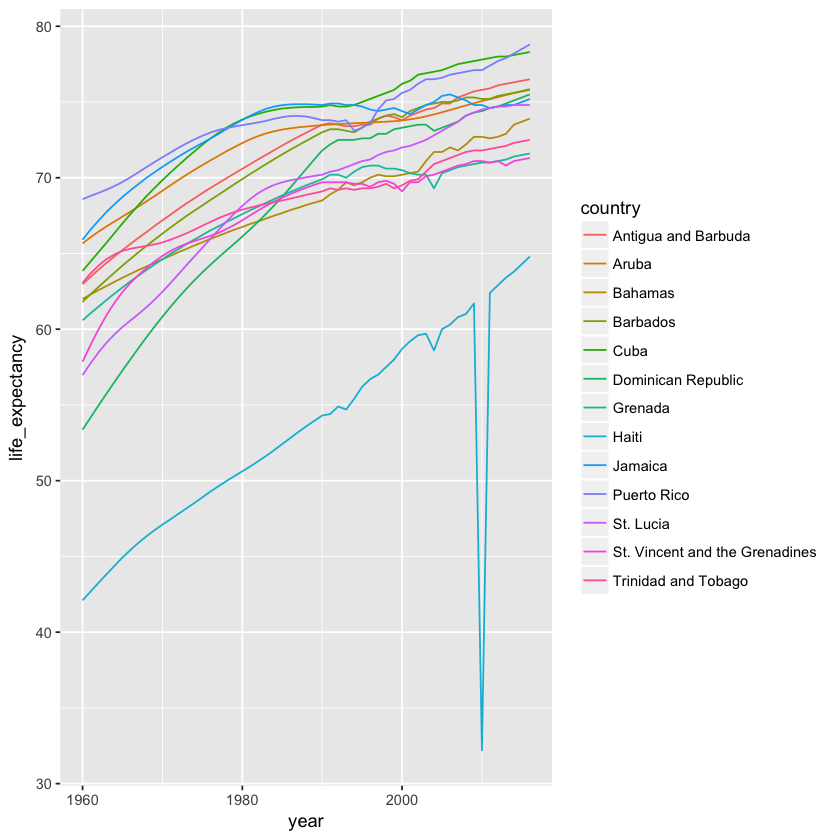

In [133]:
gapminder %>%
    filter(region == "Caribbean") %>%
    ggplot(aes(year, life_expectancy, color = country)) +
           geom_line()

In [135]:
# list of longer country names
gapminder %>%
    filter(region == "Caribbean") %>%
    filter(str_length(country) >= 12) %>%
    distinct(country)

country
Antigua and Barbuda
Dominican Republic
St. Vincent and the Grenadines
Trinidad and Tobago


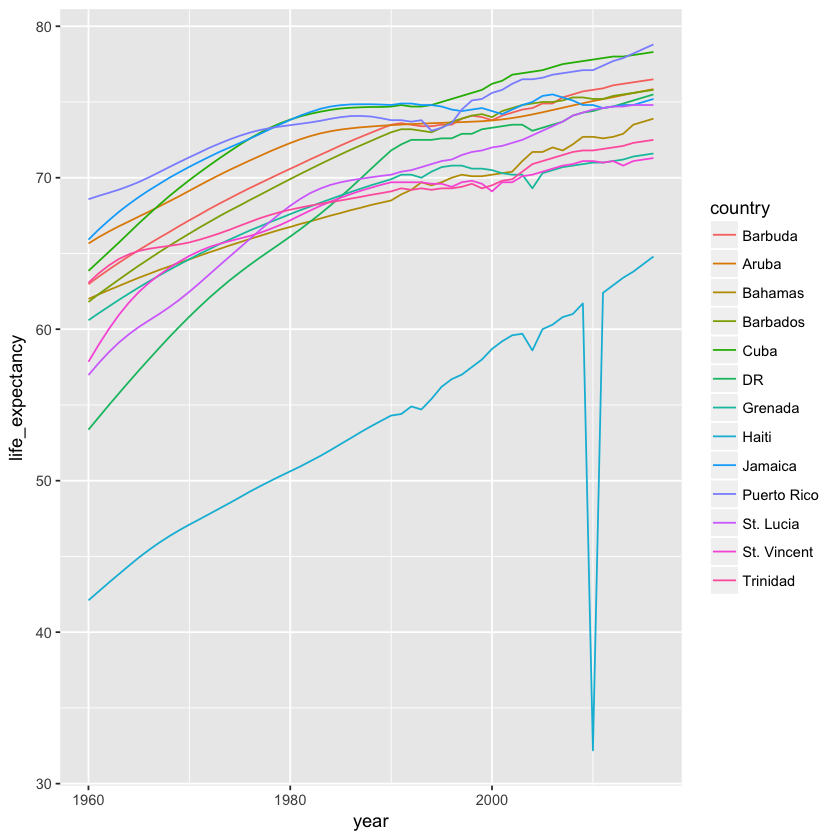

In [136]:
gapminder %>%
    filter(region == "Caribbean") %>%
    mutate(country = recode(country, 
                           'Antigua and Barbuda' = 'Barbuda',
                           'Dominican Republic' = 'DR',
                           'St. Vincent and the Grenadines' = 'St. Vincent',
                           'Trinidad and Tobago' = 'Trinidad')) %>%
    ggplot(aes(year, life_expectancy, color = country)) +
    geom_line()

There are other useful functions as well like `recode_factor()` and `fct_recoder()`

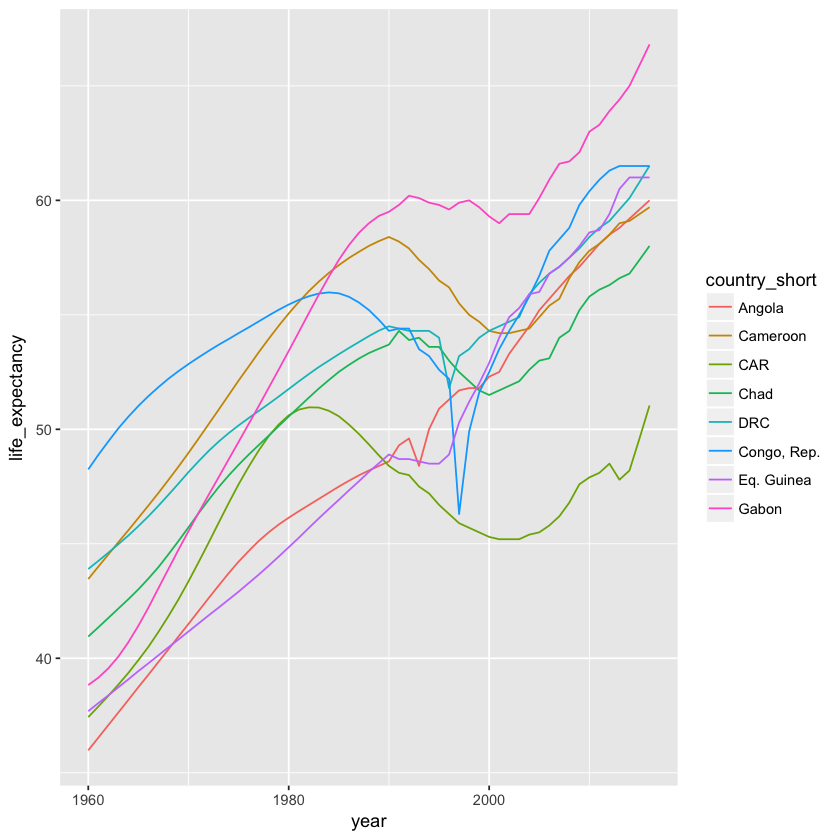

In [145]:
gapminder %>%
  filter(region == "Middle Africa") %>% 
  mutate(country_short = recode(country, 
                          "Central African Republic" = "CAR", 
                          "Congo, Dem. Rep." = "DRC",
                          "Equatorial Guinea" = "Eq. Guinea")) %>%
      
    ggplot(aes(year, life_expectancy, color = country_short)) +
    geom_line()

<a id="dates"></a>
## Dates, Times and Text Mining
[Top](#top)

In [146]:
data("polls_us_election_2016")
polls_us_election_2016$startdate %>% head

[1] "2016-11-03" "2016-11-01" "2016-11-02" "2016-11-04" "2016-11-03"
[6] "2016-11-03"

In [147]:
class(polls_us_election_2016$startdate)

[1] "Date"

In [149]:
as.numeric(polls_us_election_2016$startdate) %>% head

[1] 17108 17106 17107 17109 17108 17108

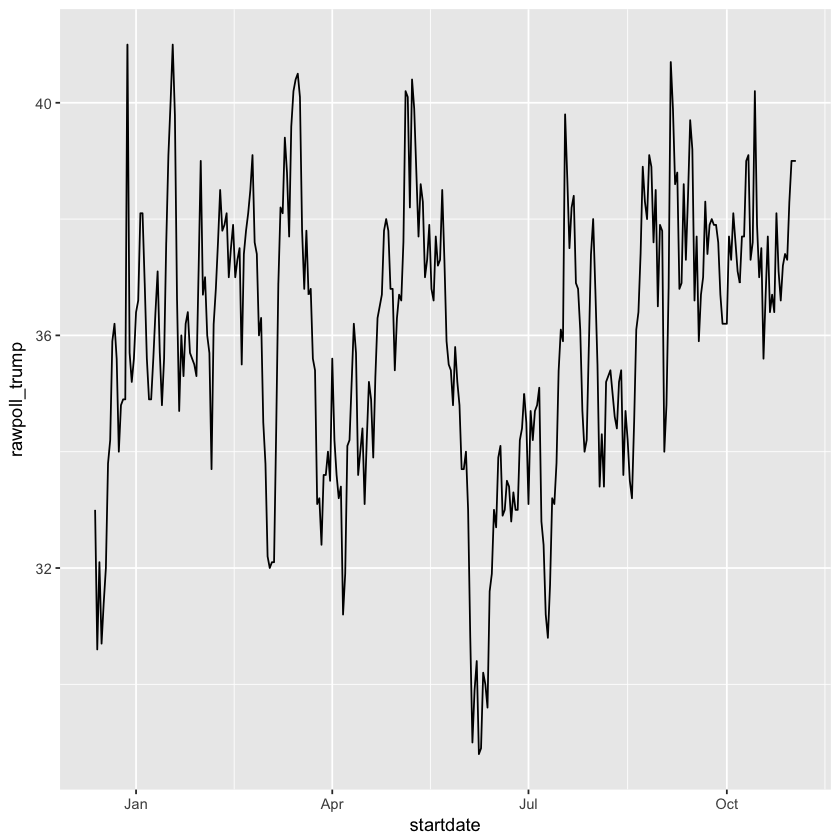

In [150]:
polls_us_election_2016 %>% 
    filter(pollster == "Ipsos" & state == "U.S.") %>%
    ggplot(aes(startdate, rawpoll_trump)) +
    geom_line()

In [151]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [152]:
set.seed(2)
dates <- sample(polls_us_election_2016$startdate, 10) %>% sort
dates

[1] "2015-11-09" "2016-02-15" "2016-07-09" "2016-08-12" "2016-08-17"
 [6] "2016-09-18" "2016-10-04" "2016-10-10" "2016-10-18" "2016-10-25"

In [153]:
data.frame(date = days(dates),
          month = month(dates),
          day = day(dates),
          year = year(dates))

date,month,day,year
16748d 0H 0M 0S,11,9,2015
16846d 0H 0M 0S,2,15,2016
16991d 0H 0M 0S,7,9,2016
17025d 0H 0M 0S,8,12,2016
17030d 0H 0M 0S,8,17,2016
17062d 0H 0M 0S,9,18,2016
17078d 0H 0M 0S,10,4,2016
17084d 0H 0M 0S,10,10,2016
17092d 0H 0M 0S,10,18,2016
17099d 0H 0M 0S,10,25,2016


In [154]:
month(dates, label = TRUE)

[1] Nov Feb Jul Aug Aug Sep Oct Oct Oct Oct
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

Using parsers to convert strings into dates example `ymd()` function

In [155]:
x <- c(20090101, "2009-01-02", "2009 01 03", "2009-1-4", "2009-1, 5", "Created on 2009 1 6", "200901 !!! 07")

ymd(x)

[1] "2009-01-01" "2009-01-02" "2009-01-03" "2009-01-04" "2009-01-05"
[6] "2009-01-06" "2009-01-07"

Prefered format is the ISO 8601 format which is `YYYY-MM-DD`

In [160]:
x <- "09/01/02"
ymd(x) #assumes we are starting with year then month then day
mdy(x)  # assumes first entry is month then day then year
ydm(x)
myd(x)
dmy(x)
dym(x)

[1] "2009-01-02"

[1] "2002-09-01"

[1] "2009-02-01"

[1] "2001-09-02"

[1] "2002-01-09"

[1] "2001-02-09"

In [161]:
Sys.time()

[1] "2018-07-28 20:49:39 +04"

In [162]:
now()

[1] "2018-07-28 20:49:48 +04"

In [163]:
now("GMT")

[1] "2018-07-28 16:49:59 GMT"

In [164]:
now("PST")

[1] "2018-07-28 16:50:09 UTC"

In [167]:
OlsonNames() #lists all time zone

[1] "Africa/Abidjan"                   "Africa/Accra"                    
  [3] "Africa/Addis_Ababa"               "Africa/Algiers"                  
  [5] "Africa/Asmara"                    "Africa/Asmera"                   
  [7] "Africa/Bamako"                    "Africa/Bangui"                   
  [9] "Africa/Banjul"                    "Africa/Bissau"                   
 [11] "Africa/Blantyre"                  "Africa/Brazzaville"              
 [13] "Africa/Bujumbura"                 "Africa/Cairo"                    
 [15] "Africa/Casablanca"                "Africa/Ceuta"                    
 [17] "Africa/Conakry"                   "Africa/Dakar"                    
 [19] "Africa/Dar_es_Salaam"             "Africa/Djibouti"                 
 [21] "Africa/Douala"                    "Africa/El_Aaiun"                 
 [23] "Africa/Freetown"                  "Africa/Gaborone"                 
 [25] "Africa/Harare"                    "Africa/Johannesburg"             
 [27] "Africa/Juba"                      "Africa/Kampala"                  
 [29] "Africa/Khartoum"                  "Africa/Kigali"                   
 [31] "Africa/Kinshasa"                  "Africa/Lagos"                    
 [33] "Africa/Libreville"                "Africa/Lome"                     
 [35] "Africa/Luanda"                    "Africa/Lubumbashi"               
 [37] "Africa/Lusaka"                    "Africa/Malabo"                   
 [39] "Africa/Maputo"                    "Africa/Maseru"                   
 [41] "Africa/Mbabane"                   "Africa/Mogadishu"                
 [43] "Africa/Monrovia"                  "Africa/Nairobi"                  
 [45] "Africa/Ndjamena"                  "Africa/Niamey"                   
 [47] "Africa/Nouakchott"                "Africa/Ouagadougou"              
 [49] "Africa/Porto-Novo"                "Africa/Sao_Tome"                 
 [51] "Africa/Timbuktu"                  "Africa/Tripoli"                  
 [53] "Africa/Tunis"                     "Africa/Windhoek"                 
 [55] "America/Adak"                     "America/Anchorage"               
 [57] "America/Anguilla"                 "America/Antigua"                 
 [59] "America/Araguaina"                "America/Argentina/Buenos_Aires"  
 [61] "America/Argentina/Catamarca"      "America/Argentina/ComodRivadavia"
 [63] "America/Argentina/Cordoba"        "America/Argentina/Jujuy"         
 [65] "America/Argentina/La_Rioja"       "America/Argentina/Mendoza"       
 [67] "America/Argentina/Rio_Gallegos"   "America/Argentina/Salta"         
 [69] "America/Argentina/San_Juan"       "America/Argentina/San_Luis"      
 [71] "America/Argentina/Tucuman"        "America/Argentina/Ushuaia"       
 [73] "America/Aruba"                    "America/Asuncion"                
 [75] "America/Atikokan"                 "America/Atka"                    
 [77] "America/Bahia"                    "America/Bahia_Banderas"          
 [79] "America/Barbados"                 "America/Belem"                   
 [81] "America/Belize"                   "America/Blanc-Sablon"            
 [83] "America/Boa_Vista"                "America/Bogota"                  
 [85] "America/Boise"                    "America/Buenos_Aires"            
 [87] "America/Cambridge_Bay"            "America/Campo_Grande"            
 [89] "America/Cancun"                   "America/Caracas"                 
 [91] "America/Catamarca"                "America/Cayenne"                 
 [93] "America/Cayman"                   "America/Chicago"                 
 [95] "America/Chihuahua"                "America/Coral_Harbour"           
 [97] "America/Cordoba"                  "America/Costa_Rica"              
 [99] "America/Creston"                  "America/Cuiaba"                  
[101] "America/Curacao"                  "America/Danmarkshavn"            
[103] "America/Dawson"                   "America/Dawson_Creek"            
[105] "America/Denver"                   "America/

In [168]:
now() %>% hour()
now() %>% minute()
now() %>% second()

[1] 20

[1] 51

[1] 23.74853

In [169]:
# example pasrse strings into time
x <- c("12:34:56")
hms(x)

[1] "12H 34M 56S"

In [170]:
x <- c("Nov/2/2012 12:34:56")
mdy_hms(x)

[1] "2012-11-02 12:34:56 UTC"

The formatting of these dates is ambiguous. They could be formatted as ymd, mdy or dmy. We need more information about our data to be able to select the correct command.

In [171]:
dates <- c("09-01-02", "01-12-07", "02-03-04")


<a id="textm"></a>
## Text Mining
[Top](#top)

With the exception of labels used to represent categorical data, we have focused on numerical data, but in many applications data starts as text. Well known examples are spam filtering, cyber-crime prevention, counter-terrorism and sentiment analysis.

In all these examples, the raw data is composed of free form texts. Our task is to extract insights from these data. In this section, we learn how to generate useful numerical summaries from text data to which we can apply some of the powerful data visualization and analysis techniques we have learned.

### Case study: Trump Tweets

During he 2016 US presidential election then candidate Donald J. Trump used his tweeter account as a way to communicate with potential voters. On August 6, 2016 Todd Vaziri [tweeted](https://twitter.com/tvaziri/status/762005541388378112/photo/1) about Trump that "Every non-hyperbolic tweet is from iPhone (his staff). Every hyperbolic tweet is from Android (from him)." Data scientist David Robison conducted an [analysis](http://varianceexplained.org/r/trump-tweets/) to determine if data supported this assertion. Here we go through David's analysis to learn some of the basics of text mining. To learn more about text mining in R we recommend this [book](https://www.tidytextmining.com/).

We will use the following libraries

In [173]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(tidyr)
library(scales)
set.seed(1)

In general, we can extract data directly from twitter using the **rtweet** package. However, in this case, a group has already compiled data for us and made it available at http://www.trumptwitterarchive.com. We

In [174]:
url <- 'http://www.trumptwitterarchive.com/data/realdonaldtrump/%s.json'
trump_tweets <- map(2009:2017, ~sprintf(url, .x)) %>%
  map_df(jsonlite::fromJSON, simplifyDataFrame = TRUE) %>%
  filter(!is_retweet & !str_detect(text, '^"')) %>%
  mutate(created_at = parse_date_time(created_at, orders = "a b! d! H!:M!:S! z!* Y!", tz="EST")) 

Date in ISO8601 format; converting timezone from UTC to "EST".


For convenience we include the result of the code above in the `dslabs` package:

```R
library(dslabs)
data("trump_tweets")
```

In [176]:
#This is data frame with information about the tweet:
head(trump_tweets)

source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
Twitter Web Client,6971079756,"From Donald Trump: Wishing everyone a wonderful holiday & a happy, healthy, prosperous New Year. Let’s think like champions in 2010!",2009-12-23 12:38:18,28,NA,12,FALSE
Twitter Web Client,6312794445,Trump International Tower in Chicago ranked 6th tallest building in world by Council on Tall Buildings & Urban Habitat http://bit.ly/sqvQq,2009-12-03 14:39:09,33,NA,6,FALSE
Twitter Web Client,6090839867,Wishing you and yours a very Happy and Bountiful Thanksgiving!,2009-11-26 14:55:38,13,NA,11,FALSE
Twitter Web Client,5775731054,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc",2009-11-16 16:06:10,5,NA,3,FALSE
Twitter Web Client,5364614040,"--Work has begun, ahead of schedule, to build the greatest golf course in history: Trump International – Scotland.",2009-11-02 09:57:56,7,NA,6,FALSE
Twitter Web Client,5203117820,"--From Donald Trump: ""Ivanka and Jared’s wedding was spectacular, and they make a beautiful couple. I’m a very proud father.""",2009-10-27 10:31:48,4,NA,5,FALSE


In [177]:
#The variables that are included are
names(trump_tweets)

[1] "source"                  "id_str"                 
[3] "text"                    "created_at"             
[5] "retweet_count"           "in_reply_to_user_id_str"
[7] "favorite_count"          "is_retweet"

The help file `?trump_tweets` provides details on what each variable represents. The tweets are represented by the `text` variable:

In [178]:
trump_tweets %>% select(text) %>% head

text
"From Donald Trump: Wishing everyone a wonderful holiday & a happy, healthy, prosperous New Year. Let’s think like champions in 2010!"
Trump International Tower in Chicago ranked 6th tallest building in world by Council on Tall Buildings & Urban Habitat http://bit.ly/sqvQq
Wishing you and yours a very Happy and Bountiful Thanksgiving!
"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc"
"--Work has begun, ahead of schedule, to build the greatest golf course in history: Trump International – Scotland."
"--From Donald Trump: ""Ivanka and Jared’s wedding was spectacular, and they make a beautiful couple. I’m a very proud father."""


and the source variable tells us the device that was used to compose and upload each tweet:

In [217]:
trump_tweets %>% count(source) %>% arrange(desc(n))

source,n
Twitter Web Client,10718
Twitter for Android,4652
Twitter for iPhone,3962
TweetDeck,468
TwitLonger Beta,288
Instagram,133
Media Studio,114
Facebook,104
Twitter Ads,96
Twitter for BlackBerry,78


We can use `extract` to remove the `Twitter for` part of the source and filter out retweets.

In [222]:
trump_tweets %>% 
  extract(source, "source", "Twitter for (.*)") %>%
  count(source) 

source,n
Android,4652
BlackBerry,78
iPad,39
iPhone,3962
Websites,1
NA,12029


We are interested in what happened during the campaign, so for the analysis here we will focus on what was tweeted between the day Trump announced his campaign and election day. So we define the following table:

In [181]:
campaign_tweets <- trump_tweets %>% 
  extract(source, "source", "Twitter for (.*)") %>%
  filter(source %in% c("Android", "iPhone") &
           created_at >= ymd("2015-06-17") & 
           created_at < ymd("2016-11-08")) %>%
  filter(!is_retweet) %>%
  arrange(created_at)

We can now use data visualization to explore the possibility that two different groups were tweeting from these devices. For each tweet, we will extract the hour, in the east coast (EST), it was tweeted then compute the proportion of tweets tweeted at each hour for each device.

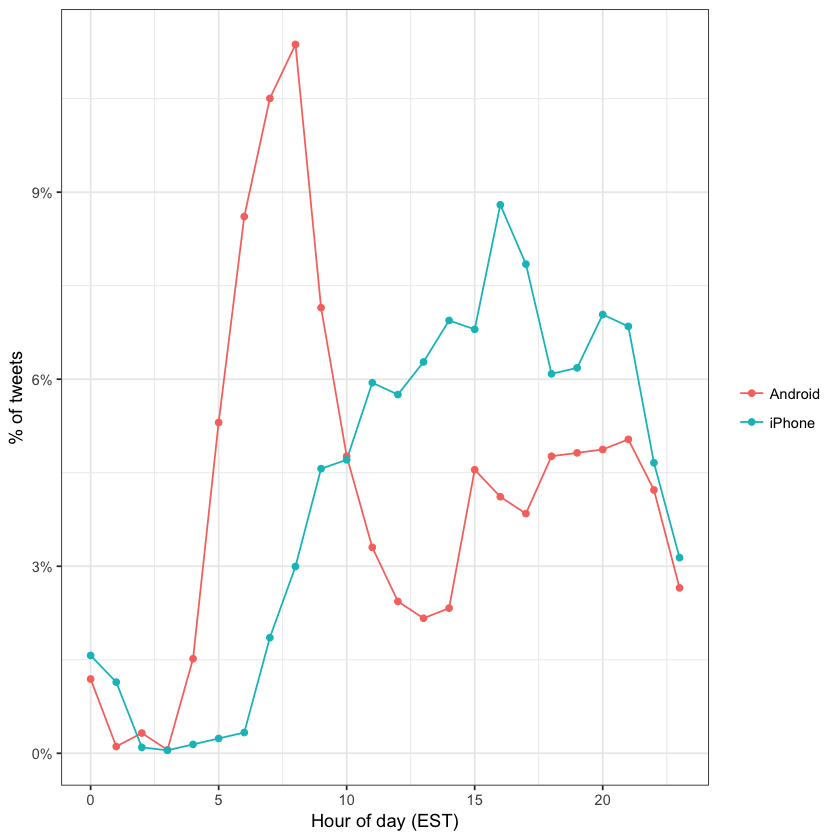

In [182]:
ds_theme_set()
campaign_tweets %>%
  mutate(hour = hour(with_tz(created_at, "EST"))) %>%
  count(source, hour) %>%
  group_by(source) %>%
  mutate(percent = n / sum(n)) %>%
  ungroup %>%
  ggplot(aes(hour, percent, color = source)) +
  geom_line() +
  geom_point() +
  scale_y_continuous(labels = percent_format()) +
  labs(x = "Hour of day (EST)",
       y = "% of tweets",
       color = "")

We notice a big peak for the Android in early hours of the morning, between 6 and 8 AM. There seems to be a clear different in these patterns. We will therefore assume that two different entities are using these two devices. Now we will study how their tweets differ. To do this we introduce the tidytext package.

### Text as data

The tidytext package helps us convert free from text into a tidy table. Having the data in this format greatly facilitates data visualization and applying statistical techniques.

In [185]:
#install.packages("tidytext")
library(tidytext)

The main function needed to achieve this is `unnest_tokens`. A token refers to the units that we are considering to be a data point. The most common token will be words, but they can also be single characters, ngrams, sentences, lines or a pattern defined by a regex. The functions will take a vector of strings and extract the tokens so that each one gets a row in the new table. Here is a simple example:

In [186]:
example <- data_frame(line = c(1, 2, 3, 4),
                      text = c("Roses are red,", "Violets are blue,", "Sugar is sweet,", "And so are you."))
example
example %>% unnest_tokens(word, text)

line,text
1,"Roses are red,"
2,"Violets are blue,"
3,"Sugar is sweet,"
4,And so are you.


line,word
1,roses
1,are
1,red
2,violets
2,are
2,blue
3,sugar
3,is
3,sweet
4,and


Now let's look at a quick example with a tweet number 3008

In [187]:
i <- 3008
campaign_tweets$text[i]
campaign_tweets[i,] %>% 
  unnest_tokens(word, text) %>%
  select(word)

[1] "Great to be back in Iowa! #TBT with @JerryJrFalwell joining me in Davenport- this past winter. #MAGA https://t.co/A5IF0QHnic"

,word
3008,great
3008.1,to
3008.2,be
3008.3,back
3008.4,in
3008.5,iowa
3008.6,tbt
3008.7,with
3008.8,jerryjrfalwell
3008.9,joining


Note that the function tries to convert tokens into words and strips characters important to twitter such as `#` and `@`. A token in twitter is not the same as in regular english. For this reason instead of using the default, words, we define a regex that captures twitter character. The pattern appears complex but all we are defining is a patter that starts with @, # or neither and is followed by any combination of letter or digits:

In [188]:
pattern <- "([^A-Za-z\\d#@']|'(?![A-Za-z\\d#@]))"

We can now use the `unnest_tokens` function with the `regex` option and appropriately extract the hashtags and mentions:

In [189]:
campaign_tweets[i,] %>% 
  unnest_tokens(word, text, token = "regex", pattern = pattern) %>%
  select(word)

word
great
to
be
back
in
iowa
#tbt
with
@jerryjrfalwell
joining


Another minor adjustment we want to make is remove the links to pictures:

In [190]:
campaign_tweets[i,] %>% 
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|&amp;", ""))  %>%
  unnest_tokens(word, text, token = "regex", pattern = pattern) %>%
  select(word)


word
great
to
be
back
in
iowa
#tbt
with
@jerryjrfalwell
joining


Now we are now read to extract the words for all our tweets.

In [191]:
tweet_words <- campaign_tweets %>% 
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|&amp;", ""))  %>%
  unnest_tokens(word, text, token = "regex", pattern = pattern) 

And we can now answer questions such as "what are the most commonly used words?"

In [192]:
tweet_words %>% 
  count(word) %>%
  arrange(desc(n))

word,n
the,2335
to,1413
and,1246
a,1210
in,1189
i,1161
you,1000
of,983
is,944
on,880


It is not surprising that these are the top words. The top words are not informative. The tidytext package has database of these commonly used words, referred to as stop words, in text mining:

In [193]:
stop_words

word,lexicon
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
actually,SMART
after,SMART


If we filter out rows representing stop words with `filter(!word %in% stop_words$word)`

In [195]:
tweet_words <- campaign_tweets %>% 
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|&amp;", ""))  %>%
  unnest_tokens(word, text, token = "regex", pattern = pattern) %>%
  filter(!word %in% stop_words$word ) 

we end up with a much more informative set of top 10 tweeted words

In [196]:
tweet_words %>% 
  count(word) %>%
  top_n(10, n) %>%
  mutate(word = reorder(word, n)) %>%
  arrange(desc(n))

word,n
#trump2016,415
hillary,407
people,303
#makeamericagreatagain,296
america,254
clinton,239
poll,220
crooked,206
trump,199
cruz,162


Some exploration of the resulting words (not show here) reveals a couple of unwanted characteristics in our tokens. First, some of our tokens are just numbers (years for example). We want to remove these and we can find them using the regex `^\d+$`. Second, some of our tokens come from a quote and they start with `'`. We want to remove the `'` when it's at the start of a word so we will use `str_replace`. We add these two lines to the code above to generate are final table:

In [197]:
tweet_words <- campaign_tweets %>% 
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|&amp;", ""))  %>%
  unnest_tokens(word, text, token = "regex", pattern = pattern) %>%
  filter(!word %in% stop_words$word &
           !str_detect(word, "^\\d+$")) %>%
  mutate(word = str_replace(word, "^'", ""))

Now that we have all our words in a table, along with information about what device was used to compose the tweet they came from, we can start exploring which words are more common when comparing Android to iPhone.

For each word we want to know if it is more likely to come from an Android tweet or an iPhone tweet. We previously introduced the odds ratio a summary statistic useful for quantifying these differences. We each device and a given word, let's call it `y`, we compute the odds or the ratio between the proportion of words that are `y` and not `y` and compute the ratio of those odds. Here we will have many proportions that are 0 so we use the 0.5 correction.

In [198]:
android_iphone_or <- tweet_words %>%
  count(word, source) %>%
  spread(source, n, fill = 0) %>%
  mutate(or = (Android + 0.5) / (sum(Android) - Android + 0.5) / 
           ( (iPhone + 0.5) / (sum(iPhone) - iPhone + 0.5)))
android_iphone_or %>% arrange(desc(or))
android_iphone_or %>% arrange(or)

word,Android,iPhone,or
mails,22,0,39.29227
poor,13,0,23.56194
poorly,12,0,21.81524
@cbsnews,11,0,20.06875
bosses,11,0,20.06875
turnberry,11,0,20.06875
angry,10,0,18.32248
write,10,0,18.32248
brexit,9,0,16.57644
defend,9,0,16.57644


word,Android,iPhone,or
#makeamericagreatagain,0,296,0.001438868
#americafirst,0,71,0.006066172
#draintheswamp,0,63,0.006834394
#trump2016,3,412,0.007178869
#votetrump,0,56,0.007685046
join,1,157,0.008210326
#imwithyou,0,51,0.008434234
#crookedhillary,0,30,0.014263160
#fitn,0,30,0.014263160
#gopdebate,0,30,0.014263160


Given that several of these words are overall low frequency words we can impose a filter based on the total frequency like this:

In [199]:
android_iphone_or %>% filter(Android+iPhone > 100) %>%
  arrange(desc(or))

android_iphone_or %>% filter(Android+iPhone > 100) %>%
  arrange(or)

word,Android,iPhone,or
@cnn,104,18,4.951435395
bad,104,26,3.454656330
crooked,157,49,2.792224365
ted,85,28,2.624630823
interviewed,76,25,2.623702669
media,77,26,2.557674284
cruz,116,46,2.193350283
hillary,290,119,2.140614127
win,74,30,2.135192446
president,84,35,2.081263102


word,Android,iPhone,or
#makeamericagreatagain,0,296,0.001438868
#trump2016,3,412,0.007178869
join,1,157,0.008210326
tomorrow,25,101,0.217801814
vote,46,67,0.599501589
america,114,141,0.703427318
tonight,71,84,0.736615892
iowa,62,65,0.831349391
poll,117,103,0.989821637
trump,112,92,1.060915059


We already see somewhat of a pattern in the types of words that are being tweeted more in one device versus the other. However, we are not interested in specific words but rather in the tone. Vaziri's assertion is that the Android tweets are more hyperbolic. So how can we check this with data? Hyperbolic is a hard sentiment to extract from words as it relies on interpreting phrases. However, words can be associated to more basic sentiment such as as anger, fear, joy and surprise. In the next section we demonstrate basic sentiment analysis.

### Sentiment Analysis

In sentiment analysis we assign a word to one or more "sentiment". Although this approach will miss context dependent sentiments, such as sarcasm, when performed on large numbers of words, summaries can provide insights.

The first step in sentiment analysis is to assign a sentiment to each word. The tidytext package includes several maps or lexicons in the object `sentiments`:

In [200]:
table(sentiments$lexicon)


   AFINN     bing loughran      nrc 
    2476     6788     4149    13901 

The `bing` lexicon divides words into `positive` and `negative`. We can see this using the tidytext function `get_sentiments`:

In [202]:
get_sentiments("bing")

word,sentiment
2-faced,negative
2-faces,negative
a+,positive
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative


The `AFINN` lexicon assigns a score between -5 and 5, with -5 the most negative and 5 the most positive.


In [203]:
get_sentiments("afinn")

word,score
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3
abhors,-3


The `loughran` and `nrc` lexicons provide several different sentiments:

In [204]:
get_sentiments("loughran") %>% count(sentiment)

sentiment,n
constraining,184
litigious,903
negative,2355
positive,354
superfluous,56
uncertainty,297


In [205]:
get_sentiments("nrc") %>% count(sentiment)

sentiment,n
anger,1247
anticipation,839
disgust,1058
fear,1476
joy,689
negative,3324
positive,2312
sadness,1191
surprise,534
trust,1231


To start learning about how these lexicons were developed read this help file `?sentiments`.

For the analysis here we are interested in exploring the different sentiments of each tweet so we will use the `nrc` lexicon:

In [206]:
nrc <- sentiments %>%
  filter(lexicon == "nrc") %>%
  select(word, sentiment)

We can combine the words and sentiments using `inner_join`, which will only keep words associated with a sentiment. Here are 10 random words extracted from the tweets:

In [207]:
tweet_words %>% inner_join(nrc, by = "word") %>% 
  select(source, word, sentiment) %>% sample_n(10)

,source,word,sentiment
4545,Android,phony,anger
6369,Android,vote,joy
9804,Android,virtue,trust
15542,iPhone,tomorrow,anticipation
3451,Android,finally,trust
15372,iPhone,honor,trust
16163,iPhone,vote,negative
11305,iPhone,bomb,sadness
10763,iPhone,negative,sadness
1057,Android,spirit,positive


Now we are ready to perform a quantitative analysis comparing Android and iPhone by comparing the sentiments of the tweets posted from each device. Here we could perform a tweet by tweet analysis, assigning a sentiment to each tweet. However, this somewhat complex since each tweet will have several sentiments attached to it, one for each word appearing in the lexicon. For illustrative purposes we will perform a much simpler analysis: we will count and compare the frequencies of each sentiment appears for each device.

In [208]:
sentiment_counts <- tweet_words %>%
  left_join(nrc, by = "word") %>%
  count(source, sentiment) %>%
  spread(source, n) %>%
  mutate(sentiment = replace_na(sentiment, replace = "none"))
sentiment_counts

sentiment,Android,iPhone
anger,965,527
anticipation,915,710
disgust,641,318
fear,802,486
joy,698,540
negative,1668,935
positive,1834,1497
sadness,907,514
surprise,530,365
trust,1253,1010


Because more words were used on the Android than on the phone:

In [209]:
tweet_words %>% group_by(source) %>% summarize(n = n())

source,n
Android,15829
iPhone,13802


For each sentiment we can compute the odds of being in the device: proportion of words with sentiment versus proportion of words without and then compute the odds ratio comparing the two devices

In [211]:
sentiment_counts %>%
  mutate(Android = Android / (sum(Android) - Android) , 
         iPhone = iPhone / (sum(iPhone) - iPhone), 
         or = Android/iPhone) %>%
  arrange(desc(or))

sentiment,Android,iPhone,or
disgust,0.03038635,0.01835710,1.6552915
anger,0.04645901,0.03079350,1.5087275
negative,0.08311740,0.05596792,1.4850902
sadness,0.04354506,0.03001109,1.4509654
fear,0.03831088,0.02832993,1.3523111
surprise,0.02499293,0.02112758,1.1829529
joy,0.03317806,0.03157710,1.0507000
anticipation,0.04394602,0.04193491,1.0479577
trust,0.06117268,0.06072996,1.0072899
positive,0.09215154,0.09272795,0.9937839


So we do see some difference and the order is interesting: the largest three sentiments are disgust, anger, and negative! But are they statistically significant? How does this compare if we are just assigning sentiments at random?

To answer that question we can compute, for each sentiment, an odds ratio and confidence interval. We will add the two values we need to form a two-by-two table and the odd rat

In [212]:
library(broom)
log_or <- sentiment_counts %>%
  mutate( log_or = log( (Android / (sum(Android) - Android)) / (iPhone / (sum(iPhone) - iPhone))),
          se = sqrt( 1/Android + 1/(sum(Android) - Android) + 1/iPhone + 1/(sum(iPhone) - iPhone)),
          conf.low = log_or - qnorm(0.975)*se,
          conf.high = log_or + qnorm(0.975)*se) %>%
  arrange(desc(log_or))
  
log_or

sentiment,Android,iPhone,log_or,se,conf.low,conf.high
disgust,641,318,0.503977127,0.06935307,0.36804761,0.63990664
anger,965,527,0.411266612,0.05513963,0.30319493,0.51933829
negative,1668,935,0.395475483,0.04217497,0.31281405,0.47813691
sadness,907,514,0.372229104,0.05616457,0.26214858,0.48230963
fear,802,486,0.301815029,0.05839998,0.18735318,0.41627688
surprise,530,365,0.168013748,0.06878633,0.03319502,0.30283247
joy,698,540,0.049456578,0.05822822,-0.06466864,0.16358179
anticipation,915,710,0.046843264,0.05107288,-0.05325773,0.14694426
trust,1253,1010,0.007263495,0.04355609,-0.07810488,0.09263187
positive,1834,1497,-0.006235497,0.03640670,-0.07759131,0.06512032


A graphical visualization shows some sentiments that are clearly overrepresented:

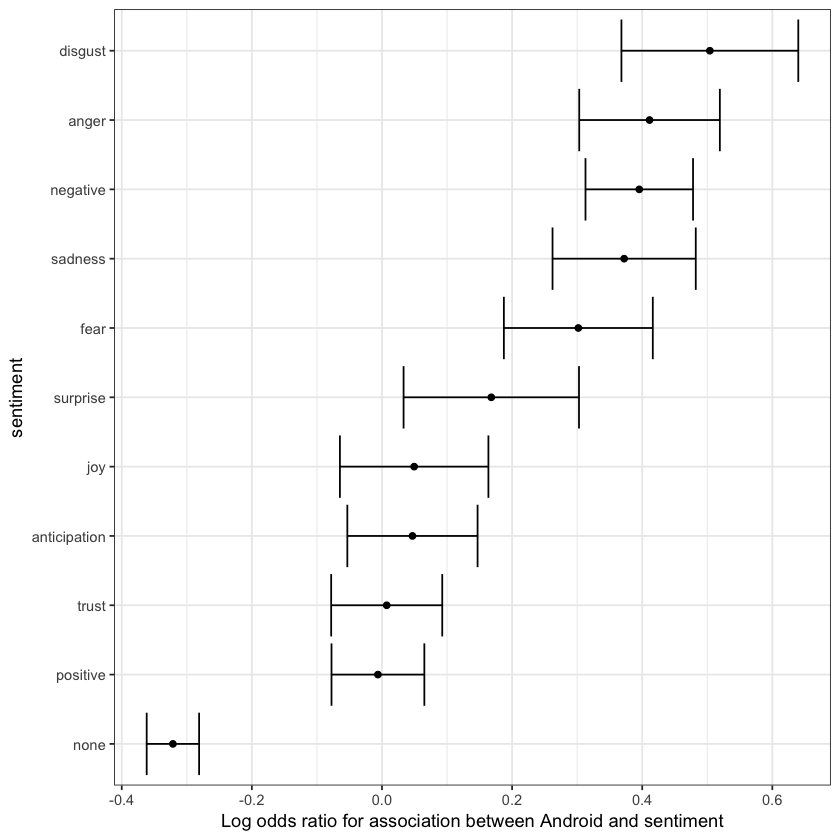

In [213]:
log_or %>%
  mutate(sentiment = reorder(sentiment, log_or),) %>%
  ggplot(aes(x = sentiment, ymin = conf.low, ymax = conf.high)) +
  geom_errorbar() +
  geom_point(aes(sentiment, log_or)) +
  ylab("Log odds ratio for association between Android and sentiment") +
  coord_flip() 

We see that the disgust, anger, negative sadness and fear sentiments are associated with the Android in a way that is hard to explain by chance alone. Words not associated to a sentiment were strongly associated with the iPhone source, whic is in agreement with the original claim about hyperbolic tweets.

If we are interested in exploring which specific words are driving these differences, we can back to our `android_iphone_or` object:

In [214]:
android_iphone_or %>% inner_join(nrc) %>%
  filter(sentiment == "disgust" & Android + iPhone > 10) %>%
  arrange(desc(or))

Joining, by = "word"


word,Android,iPhone,or,sentiment
mess,15,2,5.4104208,disgust
finally,12,2,4.3624150,disgust
unfair,12,2,4.3624150,disgust
bad,104,26,3.4546563,disgust
lie,13,3,3.3652605,disgust
terrible,31,8,3.2358005,disgust
lying,9,3,2.3675475,disgust
waste,12,5,1.9824849,disgust
phony,21,9,1.9746888,disgust
illegal,32,14,1.9563386,disgust


We can make a graph

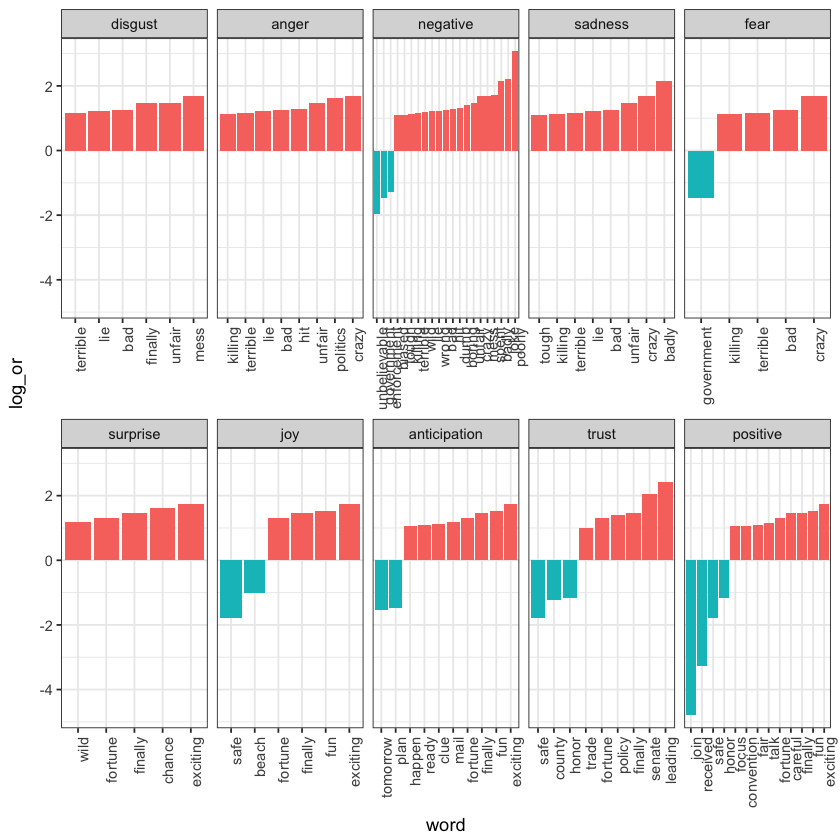

In [215]:
android_iphone_or %>% inner_join(nrc, by = "word") %>%
  mutate(sentiment = factor(sentiment, levels = log_or$sentiment)) %>%
  mutate(log_or = log(or)) %>%
  filter(Android + iPhone > 10 & abs(log_or)>1) %>%
  mutate(word = reorder(word, log_or)) %>%
  ggplot(aes(word, log_or, fill = log_or < 0)) +
  facet_wrap(~sentiment, scales = "free_x", nrow = 2) + 
  geom_bar(stat="identity", show.legend = FALSE) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 